In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_selection import mutual_info_classif
import ppscore as pps
import seaborn as sns

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

Using: cuda


In [3]:
class CricketDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

__4 LAYER MODELS__

In [4]:
class LinearModel4Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
    def forward(self, x):
        return self.fc(x)

In [5]:
class CNNModel4Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [6]:
class RNNModel4Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.rnn = nn.RNN(input_dim, 32, num_layers=4, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])


In [7]:
class LSTMModel4Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 32, num_layers=4, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])


In [8]:
class GRUModel4Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.gru = nn.GRU(input_dim, 32, num_layers=4, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])


In [9]:
class BiLSTMModel4Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.bilstm = nn.LSTM(input_dim, 32, num_layers=4, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.bilstm(x)
        return self.fc(out[:, -1, :])


In [10]:
class TransformerModel4Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, 8)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=8, nhead=4)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=4)
        self.fc = nn.Linear(8, num_classes)

    def forward(self, x):
        x = self.input_proj(x)
        x = x.unsqueeze(1)
        x = self.transformer(x)
        x = x.mean(dim=1)
        return self.fc(x)


__5 LAYERS MODELS__

In [11]:
class LinearModel5Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
    def forward(self, x):
        return self.fc(x)


In [12]:
class CNNModel5Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [13]:
class RNNModel5Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.rnn = nn.RNN(input_dim, 32, num_layers=5, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])


In [14]:
class LSTMModel5Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 32, num_layers=5, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])


In [15]:
class GRUModel5Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.gru = nn.GRU(input_dim, 32, num_layers=5, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])


In [16]:
class BiLSTMModel5Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.bilstm = nn.LSTM(input_dim, 32, num_layers=5, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.bilstm(x)
        return self.fc(out[:, -1, :])


In [17]:
class TransformerModel5Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, 8)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=8, nhead=4)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=5)
        self.fc = nn.Linear(8, num_classes)

    def forward(self, x):
        x = self.input_proj(x)
        x = x.unsqueeze(1)
        x = self.transformer(x)
        x = x.mean(dim=1)
        return self.fc(x)


__TRAIN AND TEST FUNCTION__

In [18]:
# Your label mapping
label_map = {0: 0, 1: 1, 2: 2, 4: 3, 6: 4}
reverse_label_map = {v: k for k, v in label_map.items()}

In [19]:
def train_and_evaluate(model, train_loader, test_loader, epochs=50, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        train_losses.append(total_train_loss / len(train_loader))

        model.eval()
        total_test_loss = 0
        all_preds, all_targets = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = model(xb)
                loss = criterion(outputs, yb)
                total_test_loss += loss.item()
                all_preds.append(outputs.argmax(1).cpu().numpy())
                all_targets.append(yb.cpu().numpy())
        test_losses.append(total_test_loss / len(test_loader))

        if epoch == 0 or (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    # Concatenate all predictions and targets
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)

    # Reverse map predictions and targets to original labels
    all_preds_original = np.vectorize(reverse_label_map.get)(all_preds)
    all_targets_original = np.vectorize(reverse_label_map.get)(all_targets)

    original_labels = sorted(label_map.keys())  # [0, 1, 2, 4, 6]

    print("\nClassification Report:")
    print(classification_report(all_targets_original,all_preds_original, labels=original_labels))
    print("Accuracy:", accuracy_score(all_targets_original, all_preds_original))

    # Confusion Matrix
    cm = confusion_matrix(all_targets_original, all_preds_original, labels=original_labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=original_labels, yticklabels=original_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Loss Plot
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model.__class__.__name__} Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
def train_and_evaluate1(model, train_loader, test_loader, epochs=100, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        train_losses.append(total_train_loss / len(train_loader))

        model.eval()
        total_test_loss = 0
        all_preds, all_targets = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = model(xb)
                loss = criterion(outputs, yb)
                total_test_loss += loss.item()
                all_preds.append(outputs.argmax(1).cpu().numpy())
                all_targets.append(yb.cpu().numpy())
        test_losses.append(total_test_loss / len(test_loader))

        if epoch == 0 or (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    # Concatenate all predictions and targets
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)

    # Reverse map predictions and targets to original labels
    all_preds_original = np.vectorize(reverse_label_map.get)(all_preds)
    all_targets_original = np.vectorize(reverse_label_map.get)(all_targets)

    original_labels = sorted(label_map.keys())  # [0, 1, 2, 4, 6]

    print("\nClassification Report:")
    print(classification_report(all_targets_original,all_preds_original, labels=original_labels))
    print("Accuracy:", accuracy_score(all_targets_original, all_preds_original))

    # Confusion Matrix
    cm = confusion_matrix(all_targets_original, all_preds_original, labels=original_labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=original_labels, yticklabels=original_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Loss Plot
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model.__class__.__name__} Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

***CSV IMPORT***

In [21]:
df = pd.read_csv('Antim_Dataset.csv')
df.head()

,Venue,Date,Match No.,Innings No.,Batting Team,Bowling Team,Over,Striker,Non Striker,Bowler,...,Previous Average Striker Runs 5,Previous Average Striker Runs 6,Previous Average Conceded Runs by Bowler 3,Previous Average Conceded Runs by Bowler 6,Previous Current Run Rate,Previous Pressure Index,Previous Wickets Remaining,Run Conceded by bowler on prev Bowl,Bowler Economy,Bowler Economy till prev ball
0,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.1,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.000000,2.000000,10.0,0.0,7.0,0.0
1,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.2,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.000000,0.760224,10.0,0.0,7.0,7.0
2,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.3,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.500000,0.422486,10.0,0.0,7.0,7.0
3,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.4,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.333333,0.651026,10.0,0.0,7.0,7.0
4,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.5,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.500000,0.645517,10.0,1.0,7.0,7.0


In [22]:
df.columns

Index(['Venue', 'Date', 'Match No.', 'Innings No.', 'Batting Team',
       'Bowling Team', 'Over', 'Striker', 'Non Striker', 'Bowler',
       'Runs by Batsman', 'Extras', 'Total runs on that bowl',
       'Runs Conceded by Bowler', 'Cumulative Runs by Batsman',
       'Cumulative Runs Conceded by Bowler', 'Cumulative Team Runs', 'Year',
       'Match ID', 'is_wicket', 'Total Wickets', 'is_legal_delivery',
       'Team Balls Count', 'Striker Balls Count', 'Team Balls Left',
       'Batsman Runs on Previous Ball', 'Total Runs on Previous Ball',
       'Over_Phase', 'Striker Strike Rate', 'Partnership Runs', 'is_dot',
       'Dot Count', 'is_boundary', 'Boundary Count', 'Average Striker Runs 3',
       'Average Striker Runs 4', 'Average Striker Runs 5',
       'Average Striker Runs 6', 'Average Conceded Runs by Bowler 3',
       'Average Conceded Runs by Bowler 6', 'Target', 'wicket_remaining',
       'Resources Remaining', 'Bowling Style', 'Venue ID', 'Batting Team ID',
       'Bowling T

***ONLY FOR 0,1,2,4,6***

In [23]:
df = df[df['Runs by Batsman'].isin([0,1,2,4,6])]

In [24]:
df['label_mapped'] = df['Runs by Batsman'].map(label_map)
df.head()

,Venue,Date,Match No.,Innings No.,Batting Team,Bowling Team,Over,Striker,Non Striker,Bowler,...,Previous Average Striker Runs 6,Previous Average Conceded Runs by Bowler 3,Previous Average Conceded Runs by Bowler 6,Previous Current Run Rate,Previous Pressure Index,Previous Wickets Remaining,Run Conceded by bowler on prev Bowl,Bowler Economy,Bowler Economy till prev ball,label_mapped
0,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.1,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.000000,2.000000,10.0,0.0,7.0,0.0,0
1,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.2,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.000000,0.760224,10.0,0.0,7.0,7.0,0
2,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.3,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.500000,0.422486,10.0,0.0,7.0,7.0,0
3,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.4,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.333333,0.651026,10.0,0.0,7.0,7.0,1
4,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.5,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.500000,0.645517,10.0,1.0,7.0,7.0,0


In [25]:
df.columns

Index(['Venue', 'Date', 'Match No.', 'Innings No.', 'Batting Team',
       'Bowling Team', 'Over', 'Striker', 'Non Striker', 'Bowler',
       'Runs by Batsman', 'Extras', 'Total runs on that bowl',
       'Runs Conceded by Bowler', 'Cumulative Runs by Batsman',
       'Cumulative Runs Conceded by Bowler', 'Cumulative Team Runs', 'Year',
       'Match ID', 'is_wicket', 'Total Wickets', 'is_legal_delivery',
       'Team Balls Count', 'Striker Balls Count', 'Team Balls Left',
       'Batsman Runs on Previous Ball', 'Total Runs on Previous Ball',
       'Over_Phase', 'Striker Strike Rate', 'Partnership Runs', 'is_dot',
       'Dot Count', 'is_boundary', 'Boundary Count', 'Average Striker Runs 3',
       'Average Striker Runs 4', 'Average Striker Runs 5',
       'Average Striker Runs 6', 'Average Conceded Runs by Bowler 3',
       'Average Conceded Runs by Bowler 6', 'Target', 'wicket_remaining',
       'Resources Remaining', 'Bowling Style', 'Venue ID', 'Batting Team ID',
       'Bowling T

In [26]:
feature_cols = [
    # Match & team context
    "Venue ID",
    "Match No.",
    "Innings No.",
    "Batting Team ID",
    "Bowling Team ID",

    # Player info
    "Striker ID",
    "Non Striker ID",
    "Bowler ID",
    "Bowling Style ID",

    # Bowler performance history
    'Bowler Economy till prev ball',
    'Run Conceded by bowler on prev Bowl',
    "Previous Average Conceded Runs by Bowler 3",
    "Previous Average Conceded Runs by Bowler 6",

    # Batter form
    "Previous Average Striker Runs 3",
    "Previous Average Striker Runs 4",
    "Previous Average Striker Runs 5",
    "Previous Average Striker Runs 6",

    # Match dynamics
    "Team Balls Count",
    "Team Balls Left",
    "Total Wickets",
    "wicket_remaining",
    "Resources Remaining",

    # Momentum/context
    "Dot Count",
    "Boundary Count",
    "Previous Current Run Rate",
    "Req. Run Rate",

    # Game phase
    "Over",
    "Over_Phase",

    # Strategy pressure
    "Previous Pressure Index"
]

target = 'Runs by Batsman'

In [27]:
x = df[feature_cols]
y = df['label_mapped']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [29]:
train_loader = DataLoader(CricketDataset(x_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(CricketDataset(x_test, y_test), batch_size=64, shuffle=False)

In [30]:
print("x_train dtype:\n", x_train.dtypes)
print("\ny_train dtype:\n", y_train.dtype)

x_train dtype:
 Venue ID                                        int64
Match No.                                       int64
Innings No.                                     int64
Batting Team ID                                 int64
Bowling Team ID                                 int64
Striker ID                                      int64
Non Striker ID                                  int64
Bowler ID                                       int64
Bowling Style ID                                int64
Bowler Economy till prev ball                 float64
Run Conceded by bowler on prev Bowl           float64
Previous Average Conceded Runs by Bowler 3    float64
Previous Average Conceded Runs by Bowler 6    float64
Previous Average Striker Runs 3               float64
Previous Average Striker Runs 4               float64
Previous Average Striker Runs 5               float64
Previous Average Striker Runs 6               float64
Team Balls Count                                int64
Team Balls L

In [31]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print(x_train.dtypes)
print("\n",x_test.dtypes)

Venue ID                                      float32
Match No.                                     float32
Innings No.                                   float32
Batting Team ID                               float32
Bowling Team ID                               float32
Striker ID                                    float32
Non Striker ID                                float32
Bowler ID                                     float32
Bowling Style ID                              float32
Bowler Economy till prev ball                 float32
Run Conceded by bowler on prev Bowl           float32
Previous Average Conceded Runs by Bowler 3    float32
Previous Average Conceded Runs by Bowler 6    float32
Previous Average Striker Runs 3               float32
Previous Average Striker Runs 4               float32
Previous Average Striker Runs 5               float32
Previous Average Striker Runs 6               float32
Team Balls Count                              float32
Team Balls Left             

In [33]:
model_dict = {
    "Linear": LinearModel4Layer,
    "CNN": CNNModel4Layer,
    "RNN": RNNModel4Layer,
    "LSTM": LSTMModel4Layer,
    "GRU": GRUModel4Layer,
    "BiLSTM": BiLSTMModel4Layer,
    "Transformer": TransformerModel4Layer,
}

In [34]:
model_dict1 = {
    "Linear": LinearModel5Layer,
    "CNN": CNNModel5Layer,
    "RNN": RNNModel5Layer,
    "LSTM": LSTMModel5Layer,
    "GRU": GRUModel5Layer,
    "BiLSTM": BiLSTMModel5Layer,
    "Transformer": TransformerModel5Layer,
}

In [35]:
for name, model_cls in model_dict.items():
    print(f"\n{'='*30}\nCreating {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5)
    print(model)


Creating Linear Model
LinearModel4Layer(
  (fc): Sequential(
    (0): Linear(in_features=29, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=5, bias=True)
  )
)

Creating CNN Model
CNNModel4Layer(
  (conv): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): ReLU()
    (6): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): ReLU()
    (8): AdaptiveAvgPool1d(output_size=1)
  )
  (fc): Linear(in_features=128, out_features=5, bias=True)
)

Creating RNN Model
RNNModel4Layer(
  (rnn): RNN(29, 32, num_layers=4, batch_first=True)
  (fc): Linear(in_features=32, out_features=5, bi

c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [36]:
for name, model_cls in model_dict1.items():
    print(f"\n{'='*30}\nCreating {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5)
    print(model)


Creating Linear Model
LinearModel5Layer(
  (fc): Sequential(
    (0): Linear(in_features=29, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=5, bias=True)
  )
)

Creating CNN Model
CNNModel5Layer(
  (conv): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): ReLU()
    (6): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): ReLU()
    (8): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (9): ReLU()
    (10): AdaptiveAvgPool1d(output_size=1)
  )
  (fc): Linear(in_features=256, o


Training Linear Model


Epoch 1, Train Loss: 1.3574, Test Loss: 1.3309
Epoch 5, Train Loss: 1.2971, Test Loss: 1.2967
Epoch 10, Train Loss: 1.2828, Test Loss: 1.2830
Epoch 15, Train Loss: 1.2606, Test Loss: 1.2691
Epoch 20, Train Loss: 1.2426, Test Loss: 1.2576
Epoch 25, Train Loss: 1.2236, Test Loss: 1.2357
Epoch 30, Train Loss: 1.1997, Test Loss: 1.2369
Epoch 35, Train Loss: 1.1833, Test Loss: 1.2204
Epoch 40, Train Loss: 1.1542, Test Loss: 1.2128
Epoch 45, Train Loss: 1.1405, Test Loss: 1.2219
Epoch 50, Train Loss: 1.1283, Test Loss: 1.2050

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.71      0.62      3291
           1       0.49      0.59      0.53      3213
           2       0.00      0.00      0.00       535
           4       0.53      0.22      0.31      1087
           6       0.27      0.07      0.11       596

    accuracy                           0.52      8722
   macro avg       0.37      0.32      0.32      8722
weighted avg    

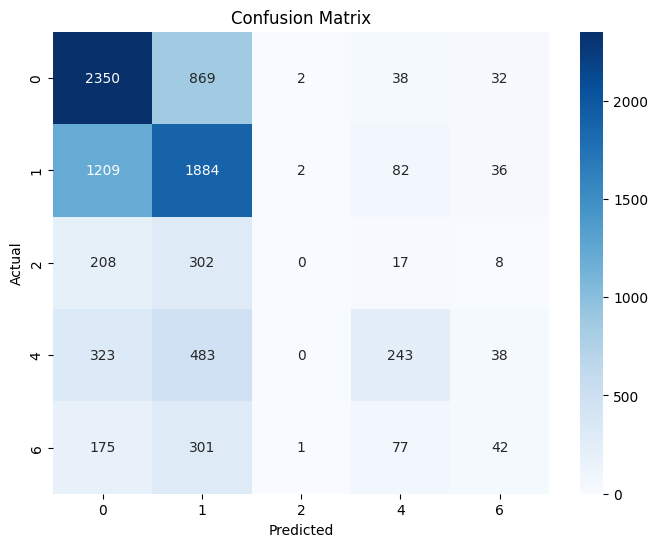

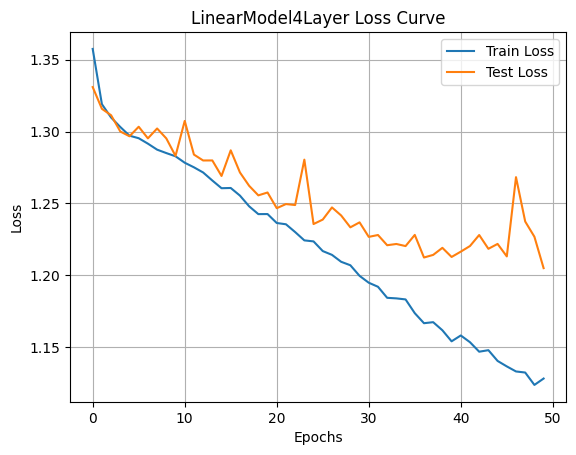

Time taken: 94.56 sec

Training CNN Model
Epoch 1, Train Loss: 1.3532, Test Loss: 1.3409
Epoch 5, Train Loss: 1.2929, Test Loss: 1.2960
Epoch 10, Train Loss: 1.2551, Test Loss: 1.2595
Epoch 15, Train Loss: 1.2017, Test Loss: 1.2026
Epoch 20, Train Loss: 1.1519, Test Loss: 1.1595
Epoch 25, Train Loss: 1.1056, Test Loss: 1.1430
Epoch 30, Train Loss: 1.0666, Test Loss: 1.0822
Epoch 35, Train Loss: 1.0262, Test Loss: 1.0743
Epoch 40, Train Loss: 0.9984, Test Loss: 1.0676
Epoch 45, Train Loss: 0.9799, Test Loss: 1.1033
Epoch 50, Train Loss: 0.9533, Test Loss: 1.0228

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      3291
           1       0.53      0.77      0.63      3213
           2       0.75      0.01      0.01       535
           4       0.58      0.29      0.39      1087
           6       0.31      0.10      0.15       596

    accuracy                           0.60      8722
   macro avg       0.58     

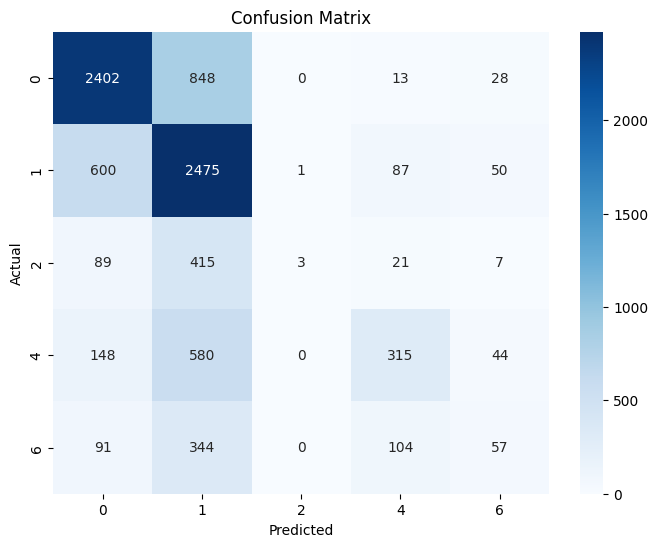

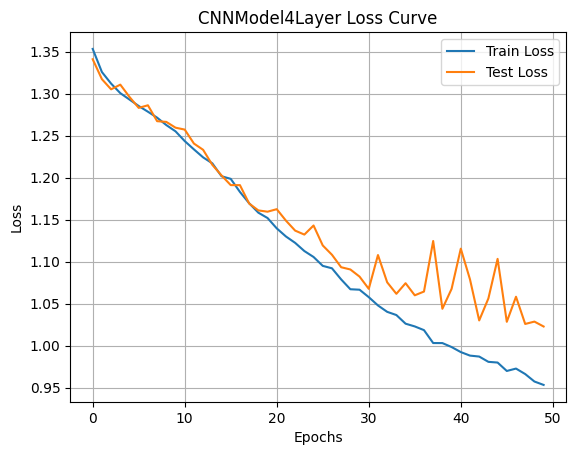

Time taken: 119.62 sec

Training RNN Model
Epoch 1, Train Loss: 1.3468, Test Loss: 1.3357
Epoch 5, Train Loss: 1.3191, Test Loss: 1.3199
Epoch 10, Train Loss: 1.3055, Test Loss: 1.3100
Epoch 15, Train Loss: 1.2978, Test Loss: 1.2993
Epoch 20, Train Loss: 1.2906, Test Loss: 1.2995
Epoch 25, Train Loss: 1.2817, Test Loss: 1.2886
Epoch 30, Train Loss: 1.2745, Test Loss: 1.2819
Epoch 35, Train Loss: 1.2693, Test Loss: 1.2694
Epoch 40, Train Loss: 1.2631, Test Loss: 1.2675
Epoch 45, Train Loss: 1.2571, Test Loss: 1.2691
Epoch 50, Train Loss: 1.2494, Test Loss: 1.2574

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.52      3291
           1       0.43      0.70      0.54      3213
           2       0.00      0.00      0.00       535
           4       0.39      0.14      0.21      1087
           6       0.27      0.01      0.02       596

    accuracy                           0.47      8722
   macro avg       0.33    

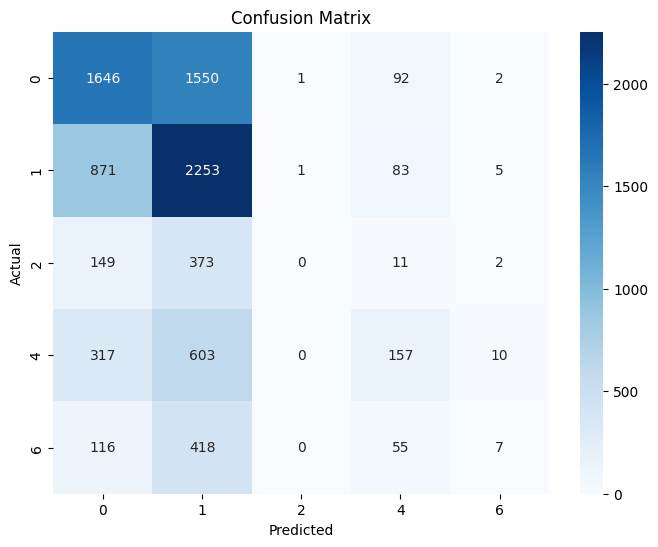

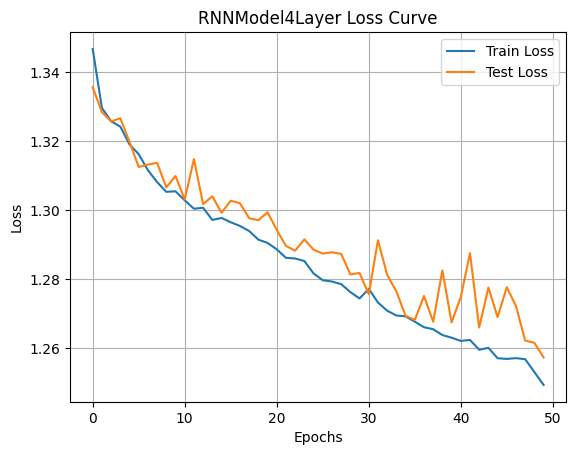

Time taken: 115.42 sec

Training LSTM Model
Epoch 1, Train Loss: 1.3646, Test Loss: 1.3484
Epoch 5, Train Loss: 1.3150, Test Loss: 1.3193
Epoch 10, Train Loss: 1.2958, Test Loss: 1.2992
Epoch 15, Train Loss: 1.2886, Test Loss: 1.2925
Epoch 20, Train Loss: 1.2758, Test Loss: 1.2864
Epoch 25, Train Loss: 1.2652, Test Loss: 1.2757
Epoch 30, Train Loss: 1.2555, Test Loss: 1.2679
Epoch 35, Train Loss: 1.2504, Test Loss: 1.2630
Epoch 40, Train Loss: 1.2435, Test Loss: 1.2534
Epoch 45, Train Loss: 1.2339, Test Loss: 1.2417
Epoch 50, Train Loss: 1.2229, Test Loss: 1.2310

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.66      0.58      3291
           1       0.45      0.58      0.50      3213
           2       0.00      0.00      0.00       535
           4       0.52      0.18      0.26      1087
           6       0.00      0.00      0.00       596

    accuracy                           0.48      8722
   macro avg       0.30   

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


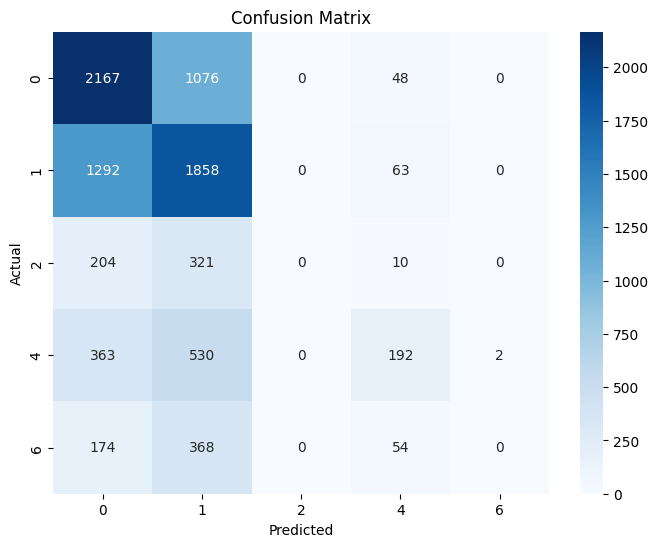

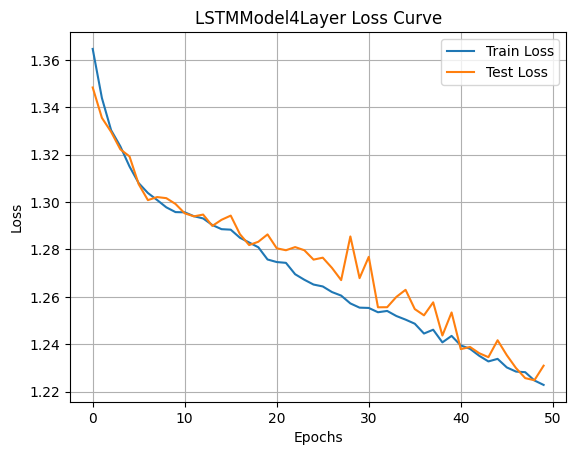

Time taken: 135.95 sec

Training GRU Model
Epoch 1, Train Loss: 1.3534, Test Loss: 1.3370
Epoch 5, Train Loss: 1.3204, Test Loss: 1.3199
Epoch 10, Train Loss: 1.2924, Test Loss: 1.2934
Epoch 15, Train Loss: 1.2797, Test Loss: 1.2815
Epoch 20, Train Loss: 1.2701, Test Loss: 1.2743
Epoch 25, Train Loss: 1.2542, Test Loss: 1.2611
Epoch 30, Train Loss: 1.2440, Test Loss: 1.2667
Epoch 35, Train Loss: 1.2292, Test Loss: 1.2516
Epoch 40, Train Loss: 1.2150, Test Loss: 1.2382
Epoch 45, Train Loss: 1.2064, Test Loss: 1.2280
Epoch 50, Train Loss: 1.1944, Test Loss: 1.2023

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      3291
           1       0.46      0.73      0.56      3213
           2       0.00      0.00      0.00       535
           4       0.46      0.25      0.32      1087
           6       0.00      0.00      0.00       596

    accuracy                           0.51      8722
   macro avg       0.30    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


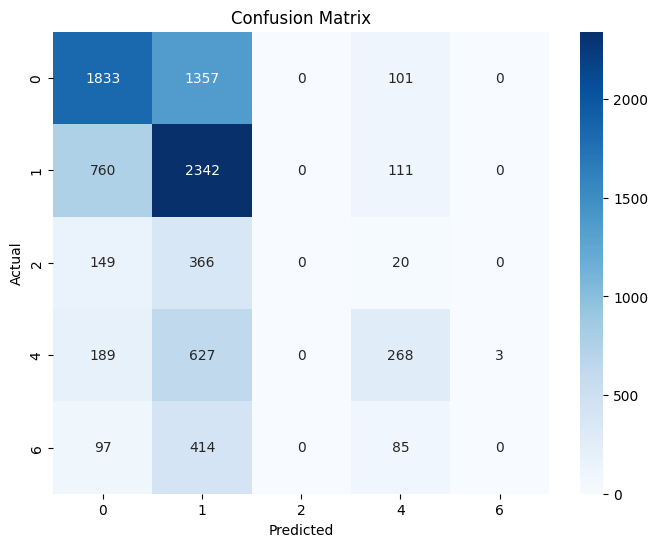

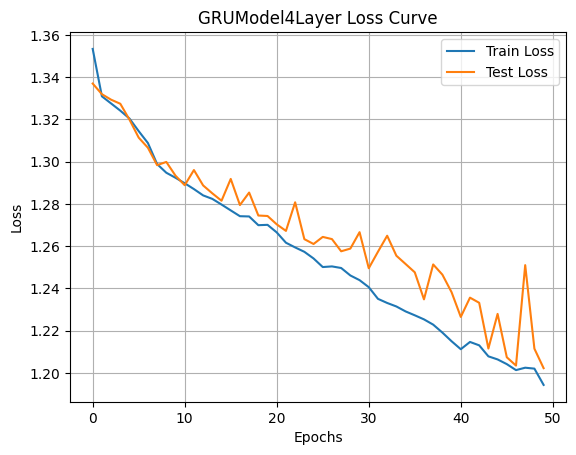

Time taken: 128.68 sec

Training BiLSTM Model
Epoch 1, Train Loss: 1.3602, Test Loss: 1.3345
Epoch 5, Train Loss: 1.3123, Test Loss: 1.3123
Epoch 10, Train Loss: 1.2959, Test Loss: 1.2975
Epoch 15, Train Loss: 1.2829, Test Loss: 1.2853
Epoch 20, Train Loss: 1.2663, Test Loss: 1.2777
Epoch 25, Train Loss: 1.2465, Test Loss: 1.2582
Epoch 30, Train Loss: 1.2264, Test Loss: 1.2451
Epoch 35, Train Loss: 1.2127, Test Loss: 1.2253
Epoch 40, Train Loss: 1.1972, Test Loss: 1.2087
Epoch 45, Train Loss: 1.1792, Test Loss: 1.2015
Epoch 50, Train Loss: 1.1664, Test Loss: 1.2302

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.84      0.62      3291
           1       0.49      0.44      0.46      3213
           2       0.40      0.00      0.01       535
           4       0.63      0.12      0.20      1087
           6       0.27      0.02      0.03       596

    accuracy                           0.49      8722
   macro avg       0.46 

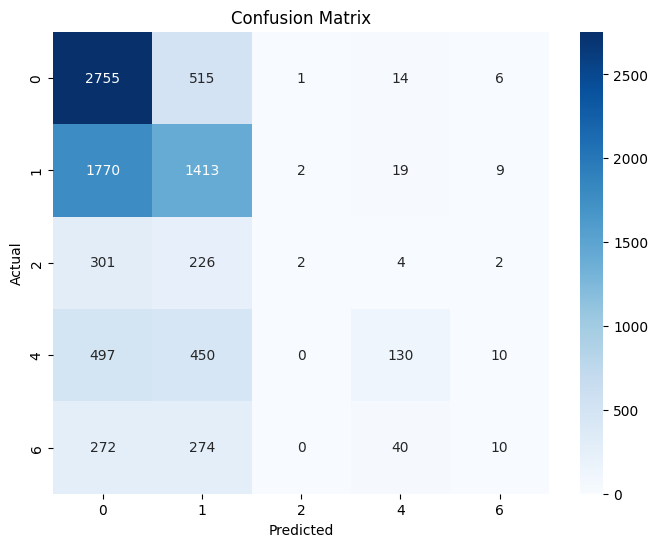

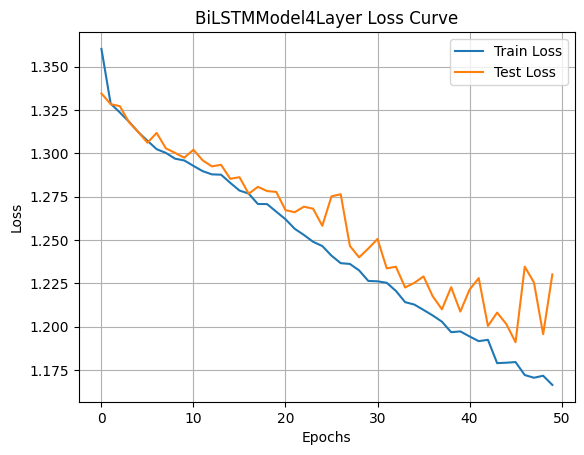

Time taken: 193.66 sec

Training Transformer Model


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Train Loss: 1.3641, Test Loss: 1.3483
Epoch 5, Train Loss: 1.3341, Test Loss: 1.3382
Epoch 10, Train Loss: 1.3311, Test Loss: 1.3309
Epoch 15, Train Loss: 1.3273, Test Loss: 1.3305
Epoch 20, Train Loss: 1.3177, Test Loss: 1.3174
Epoch 25, Train Loss: 1.3009, Test Loss: 1.3009
Epoch 30, Train Loss: 1.2934, Test Loss: 1.2869
Epoch 35, Train Loss: 1.2854, Test Loss: 1.2750
Epoch 40, Train Loss: 1.2712, Test Loss: 1.2546
Epoch 45, Train Loss: 1.2561, Test Loss: 1.2403
Epoch 50, Train Loss: 1.2436, Test Loss: 1.2242

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.63      0.60      3291
           1       0.47      0.66      0.55      3213
           2       0.00      0.00      0.00       535
           4       0.40      0.17      0.24      1087
           6       0.00      0.00      0.00       596

    accuracy                           0.50      8722
   macro avg       0.29      0.29      0.28      8722
weighted avg    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


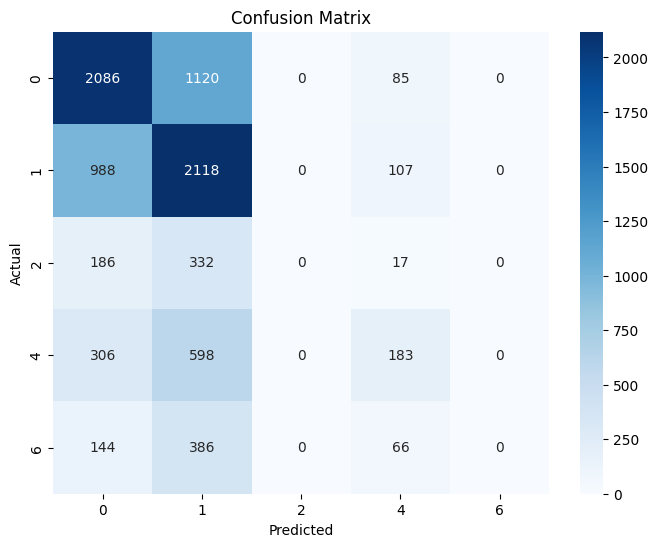

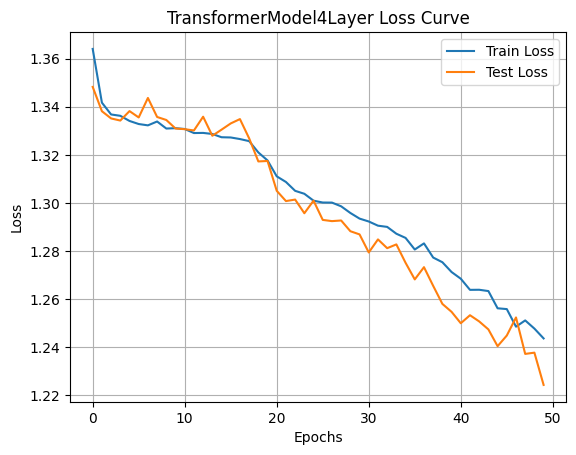

Time taken: 458.25 sec


In [37]:
for name, model_cls in model_dict.items():
    print(f"\n{'='*30}\nTraining {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5).to(device)
    start_time = time.time()
    train_and_evaluate(model, train_loader, test_loader)
    print(f"Time taken: {time.time() - start_time:.2f} sec")


Training Linear Model
Epoch 1, Train Loss: 1.3516, Test Loss: 1.3340
Epoch 5, Train Loss: 1.2980, Test Loss: 1.3054
Epoch 10, Train Loss: 1.2791, Test Loss: 1.2878
Epoch 15, Train Loss: 1.2555, Test Loss: 1.2662
Epoch 20, Train Loss: 1.2370, Test Loss: 1.2580
Epoch 25, Train Loss: 1.2200, Test Loss: 1.2428
Epoch 30, Train Loss: 1.2028, Test Loss: 1.2296
Epoch 35, Train Loss: 1.1851, Test Loss: 1.2170
Epoch 40, Train Loss: 1.1680, Test Loss: 1.2227
Epoch 45, Train Loss: 1.1530, Test Loss: 1.2036
Epoch 50, Train Loss: 1.1415, Test Loss: 1.1974
Epoch 55, Train Loss: 1.1207, Test Loss: 1.1942
Epoch 60, Train Loss: 1.1072, Test Loss: 1.2008
Epoch 65, Train Loss: 1.0928, Test Loss: 1.1814
Epoch 70, Train Loss: 1.0741, Test Loss: 1.1810
Epoch 75, Train Loss: 1.0584, Test Loss: 1.1720
Epoch 80, Train Loss: 1.0310, Test Loss: 1.1421
Epoch 85, Train Loss: 1.0125, Test Loss: 1.1259
Epoch 90, Train Loss: 0.9836, Test Loss: 1.2623
Epoch 95, Train Loss: 0.9680, Test Loss: 1.1347
Epoch 100, Train Lo

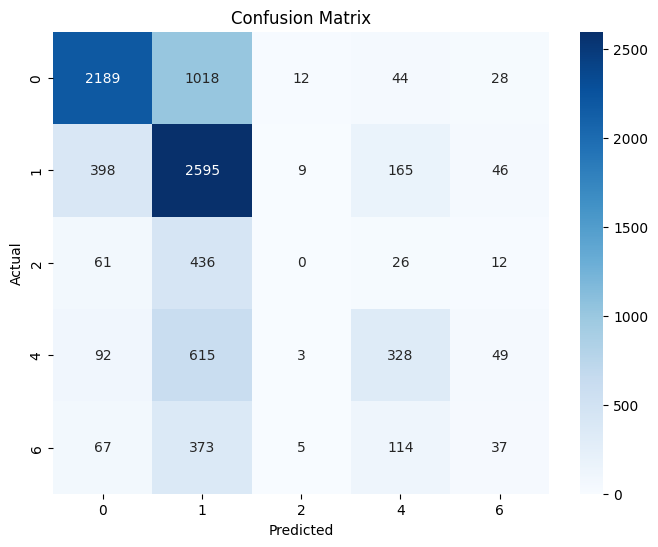

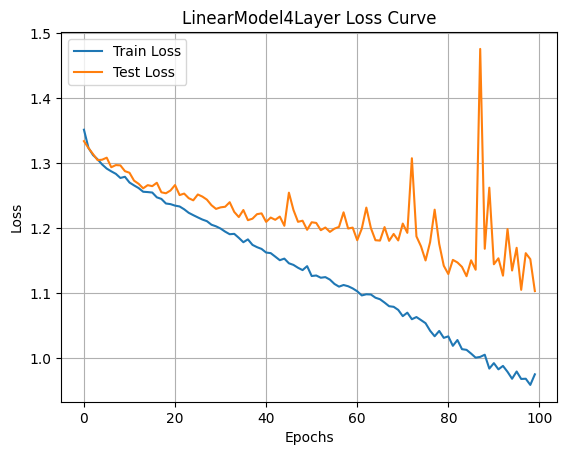

Time taken: 134.36 sec

Training CNN Model
Epoch 1, Train Loss: 1.3549, Test Loss: 1.3452
Epoch 5, Train Loss: 1.3003, Test Loss: 1.2960
Epoch 10, Train Loss: 1.2567, Test Loss: 1.2563
Epoch 15, Train Loss: 1.2093, Test Loss: 1.2599
Epoch 20, Train Loss: 1.1576, Test Loss: 1.1807
Epoch 25, Train Loss: 1.1019, Test Loss: 1.1334
Epoch 30, Train Loss: 1.0537, Test Loss: 1.1262
Epoch 35, Train Loss: 1.0163, Test Loss: 1.0967
Epoch 40, Train Loss: 0.9836, Test Loss: 1.0750
Epoch 45, Train Loss: 0.9558, Test Loss: 1.0308
Epoch 50, Train Loss: 0.9410, Test Loss: 1.0380
Epoch 55, Train Loss: 0.9166, Test Loss: 1.0119
Epoch 60, Train Loss: 0.8982, Test Loss: 1.0153
Epoch 65, Train Loss: 0.8830, Test Loss: 1.0345
Epoch 70, Train Loss: 0.8620, Test Loss: 1.0080
Epoch 75, Train Loss: 0.8440, Test Loss: 1.0424
Epoch 80, Train Loss: 0.8363, Test Loss: 1.1108
Epoch 85, Train Loss: 0.8150, Test Loss: 1.0290
Epoch 90, Train Loss: 0.7954, Test Loss: 1.0165
Epoch 95, Train Loss: 0.7878, Test Loss: 1.0439

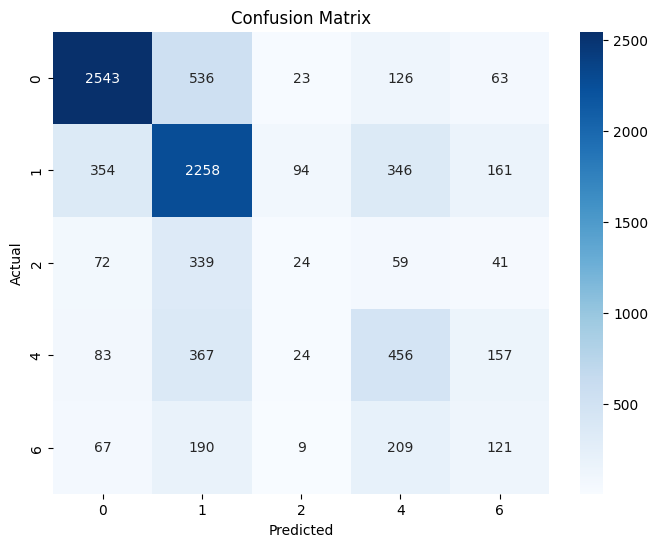

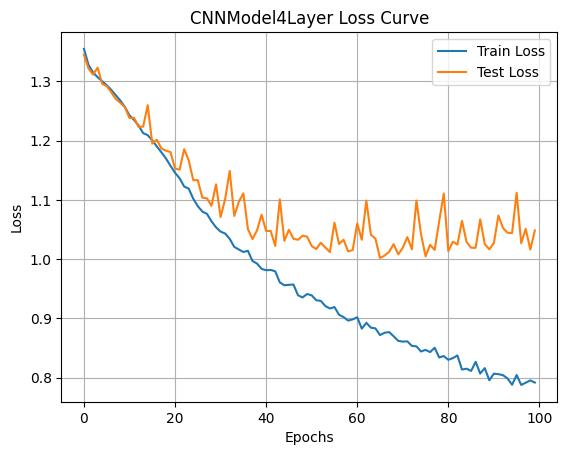

Time taken: 171.30 sec

Training RNN Model
Epoch 1, Train Loss: 1.3488, Test Loss: 1.3418
Epoch 5, Train Loss: 1.3287, Test Loss: 1.3298
Epoch 10, Train Loss: 1.3179, Test Loss: 1.3183
Epoch 15, Train Loss: 1.3098, Test Loss: 1.3095
Epoch 20, Train Loss: 1.3015, Test Loss: 1.3023
Epoch 25, Train Loss: 1.2979, Test Loss: 1.2958
Epoch 30, Train Loss: 1.2907, Test Loss: 1.2936
Epoch 35, Train Loss: 1.2845, Test Loss: 1.2827
Epoch 40, Train Loss: 1.2762, Test Loss: 1.2828
Epoch 45, Train Loss: 1.2738, Test Loss: 1.2858
Epoch 50, Train Loss: 1.2707, Test Loss: 1.2868
Epoch 55, Train Loss: 1.2647, Test Loss: 1.2760
Epoch 60, Train Loss: 1.2579, Test Loss: 1.2702
Epoch 65, Train Loss: 1.2550, Test Loss: 1.2663
Epoch 70, Train Loss: 1.2500, Test Loss: 1.2541
Epoch 75, Train Loss: 1.2393, Test Loss: 1.2574
Epoch 80, Train Loss: 1.2293, Test Loss: 1.2540
Epoch 85, Train Loss: 1.2243, Test Loss: 1.2321
Epoch 90, Train Loss: 1.2141, Test Loss: 1.2207
Epoch 95, Train Loss: 1.2034, Test Loss: 1.2184

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


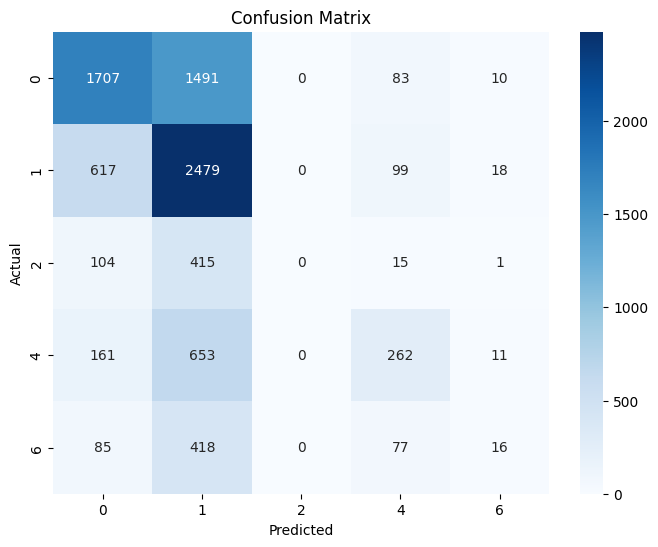

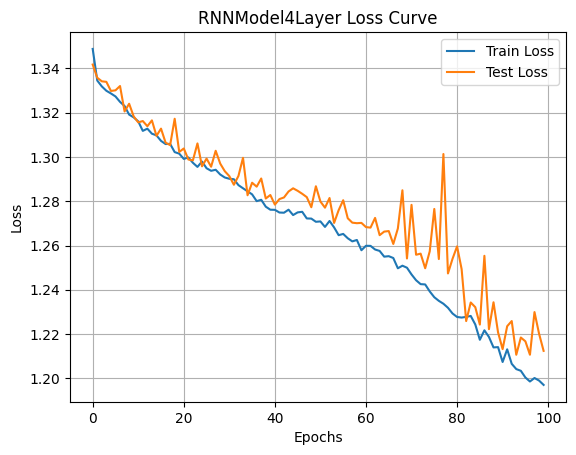

Time taken: 177.52 sec

Training LSTM Model
Epoch 1, Train Loss: 1.3759, Test Loss: 1.3474
Epoch 5, Train Loss: 1.3234, Test Loss: 1.3223
Epoch 10, Train Loss: 1.2963, Test Loss: 1.2990
Epoch 15, Train Loss: 1.2874, Test Loss: 1.2885
Epoch 20, Train Loss: 1.2756, Test Loss: 1.2972
Epoch 25, Train Loss: 1.2676, Test Loss: 1.2713
Epoch 30, Train Loss: 1.2577, Test Loss: 1.2627
Epoch 35, Train Loss: 1.2486, Test Loss: 1.2482
Epoch 40, Train Loss: 1.2420, Test Loss: 1.2392
Epoch 45, Train Loss: 1.2343, Test Loss: 1.2397
Epoch 50, Train Loss: 1.2322, Test Loss: 1.2281
Epoch 55, Train Loss: 1.2276, Test Loss: 1.2339
Epoch 60, Train Loss: 1.2205, Test Loss: 1.2261
Epoch 65, Train Loss: 1.2167, Test Loss: 1.2209
Epoch 70, Train Loss: 1.2158, Test Loss: 1.2273
Epoch 75, Train Loss: 1.2033, Test Loss: 1.2032
Epoch 80, Train Loss: 1.1964, Test Loss: 1.2030
Epoch 85, Train Loss: 1.1943, Test Loss: 1.1999
Epoch 90, Train Loss: 1.1873, Test Loss: 1.2016
Epoch 95, Train Loss: 1.1805, Test Loss: 1.192

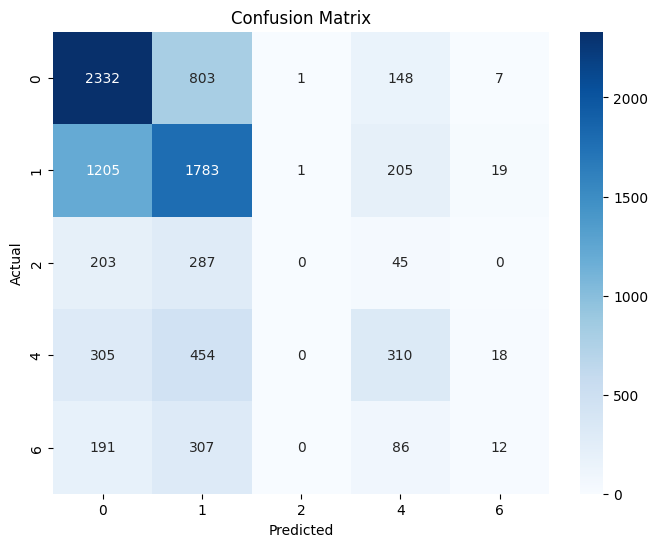

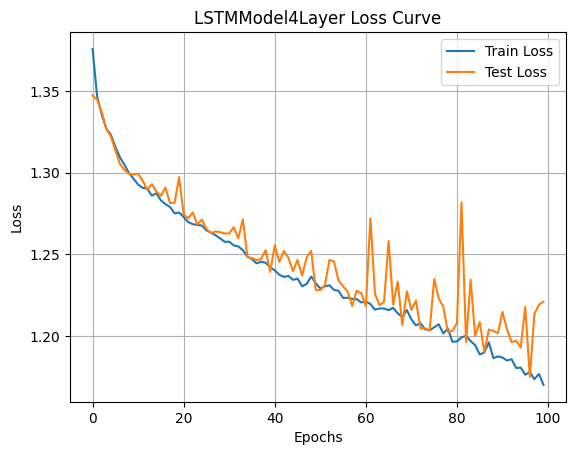

Time taken: 207.25 sec

Training GRU Model
Epoch 1, Train Loss: 1.3641, Test Loss: 1.3346
Epoch 5, Train Loss: 1.3098, Test Loss: 1.3090
Epoch 10, Train Loss: 1.2925, Test Loss: 1.2958
Epoch 15, Train Loss: 1.2860, Test Loss: 1.2941
Epoch 20, Train Loss: 1.2765, Test Loss: 1.2755
Epoch 25, Train Loss: 1.2627, Test Loss: 1.2845
Epoch 30, Train Loss: 1.2486, Test Loss: 1.2597
Epoch 35, Train Loss: 1.2319, Test Loss: 1.2408
Epoch 40, Train Loss: 1.2060, Test Loss: 1.2088
Epoch 45, Train Loss: 1.1845, Test Loss: 1.1979
Epoch 50, Train Loss: 1.1777, Test Loss: 1.2108
Epoch 55, Train Loss: 1.1683, Test Loss: 1.1673
Epoch 60, Train Loss: 1.1603, Test Loss: 1.1862
Epoch 65, Train Loss: 1.1525, Test Loss: 1.1891
Epoch 70, Train Loss: 1.1430, Test Loss: 1.1621
Epoch 75, Train Loss: 1.1258, Test Loss: 1.2819
Epoch 80, Train Loss: 1.1116, Test Loss: 1.1068
Epoch 85, Train Loss: 1.0776, Test Loss: 1.1977
Epoch 90, Train Loss: 1.0487, Test Loss: 1.0377
Epoch 95, Train Loss: 1.0460, Test Loss: 1.0398

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


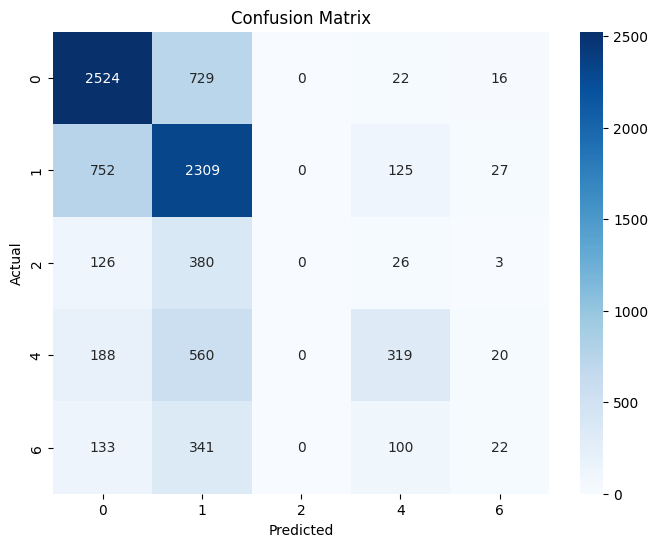

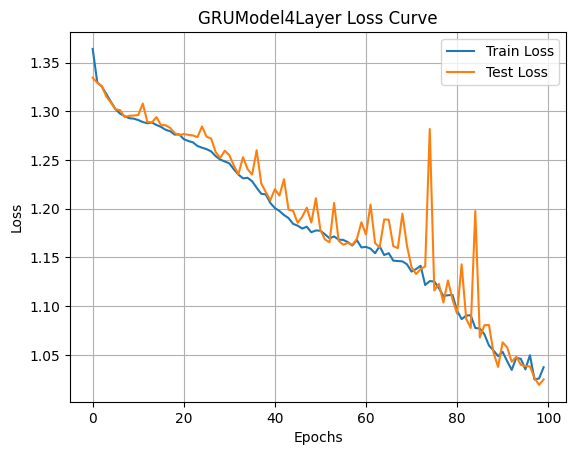

Time taken: 189.43 sec

Training BiLSTM Model
Epoch 1, Train Loss: 1.3594, Test Loss: 1.3373
Epoch 5, Train Loss: 1.3140, Test Loss: 1.3128
Epoch 10, Train Loss: 1.2925, Test Loss: 1.2958
Epoch 15, Train Loss: 1.2866, Test Loss: 1.2927
Epoch 20, Train Loss: 1.2768, Test Loss: 1.2909
Epoch 25, Train Loss: 1.2643, Test Loss: 1.2826
Epoch 30, Train Loss: 1.2518, Test Loss: 1.2593
Epoch 35, Train Loss: 1.2405, Test Loss: 1.2524
Epoch 40, Train Loss: 1.2275, Test Loss: 1.2496
Epoch 45, Train Loss: 1.2194, Test Loss: 1.2430
Epoch 50, Train Loss: 1.2117, Test Loss: 1.2491
Epoch 55, Train Loss: 1.2010, Test Loss: 1.2427
Epoch 60, Train Loss: 1.1918, Test Loss: 1.2179
Epoch 65, Train Loss: 1.1816, Test Loss: 1.2315
Epoch 70, Train Loss: 1.1702, Test Loss: 1.2177
Epoch 75, Train Loss: 1.1575, Test Loss: 1.2098
Epoch 80, Train Loss: 1.1511, Test Loss: 1.2090
Epoch 85, Train Loss: 1.1400, Test Loss: 1.2145
Epoch 90, Train Loss: 1.1316, Test Loss: 1.2108
Epoch 95, Train Loss: 1.1232, Test Loss: 1.2

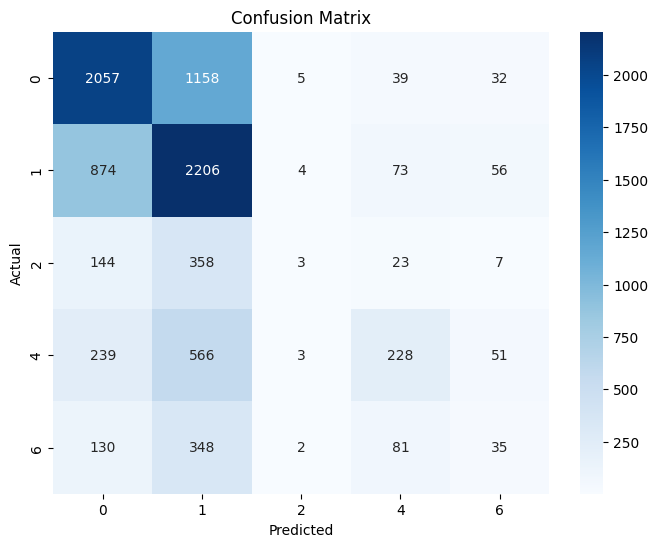

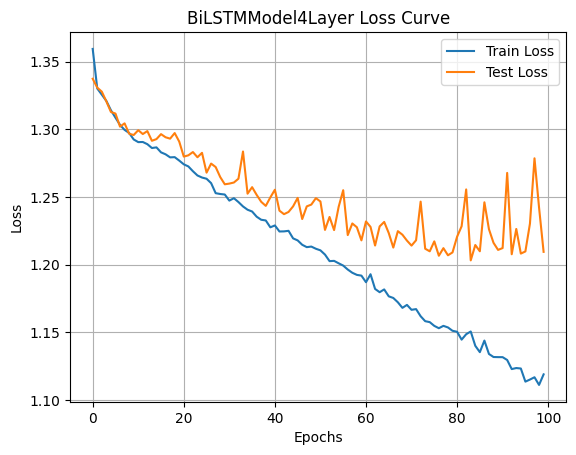

Time taken: 303.41 sec

Training Transformer Model


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Train Loss: 1.3577, Test Loss: 1.3553
Epoch 5, Train Loss: 1.3343, Test Loss: 1.3361
Epoch 10, Train Loss: 1.3316, Test Loss: 1.3348
Epoch 15, Train Loss: 1.3284, Test Loss: 1.3306
Epoch 20, Train Loss: 1.3240, Test Loss: 1.3270
Epoch 25, Train Loss: 1.3162, Test Loss: 1.3201
Epoch 30, Train Loss: 1.3049, Test Loss: 1.2977
Epoch 35, Train Loss: 1.2977, Test Loss: 1.2949
Epoch 40, Train Loss: 1.2905, Test Loss: 1.2834
Epoch 45, Train Loss: 1.2782, Test Loss: 1.2707
Epoch 50, Train Loss: 1.2721, Test Loss: 1.2608
Epoch 55, Train Loss: 1.2641, Test Loss: 1.2556
Epoch 60, Train Loss: 1.2564, Test Loss: 1.2504
Epoch 65, Train Loss: 1.2431, Test Loss: 1.2354
Epoch 70, Train Loss: 1.2336, Test Loss: 1.2402
Epoch 75, Train Loss: 1.2222, Test Loss: 1.2061
Epoch 80, Train Loss: 1.2102, Test Loss: 1.2071
Epoch 85, Train Loss: 1.2059, Test Loss: 1.1903
Epoch 90, Train Loss: 1.2007, Test Loss: 1.2045
Epoch 95, Train Loss: 1.1897, Test Loss: 1.1661
Epoch 100, Train Loss: 1.1798, Test Loss: 

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


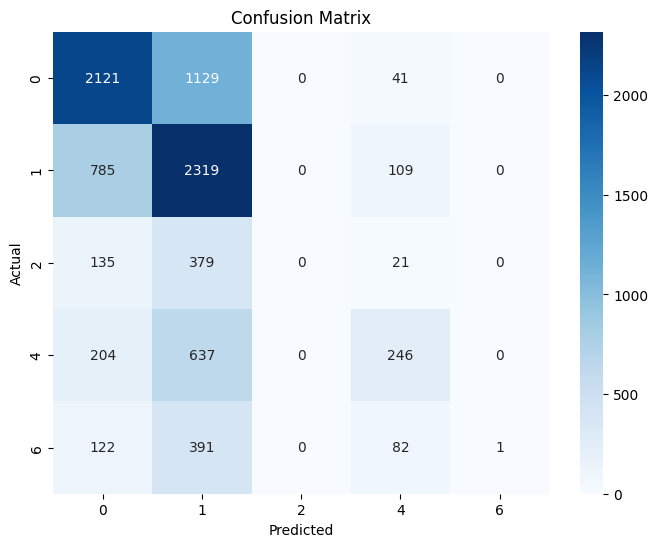

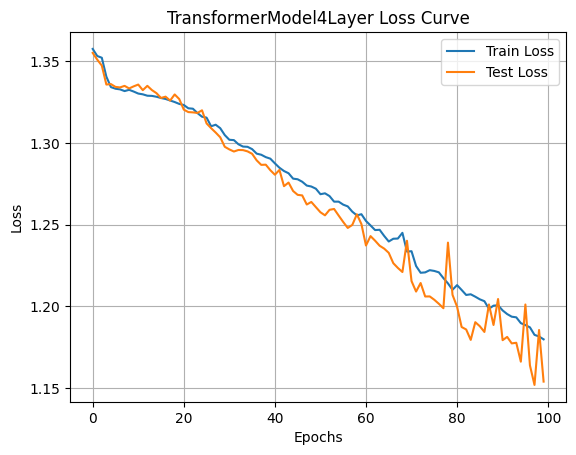

Time taken: 813.38 sec


In [38]:
for name, model_cls in model_dict.items():
    print(f"\n{'='*30}\nTraining {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5).to(device)
    start_time = time.time()
    train_and_evaluate1(model, train_loader, test_loader)
    print(f"Time taken: {time.time() - start_time:.2f} sec")


Training Linear Model
Epoch 1, Train Loss: 1.3468, Test Loss: 1.3327
Epoch 5, Train Loss: 1.2994, Test Loss: 1.2928
Epoch 10, Train Loss: 1.2783, Test Loss: 1.2766
Epoch 15, Train Loss: 1.2542, Test Loss: 1.2672
Epoch 20, Train Loss: 1.2304, Test Loss: 1.2407
Epoch 25, Train Loss: 1.1989, Test Loss: 1.2614
Epoch 30, Train Loss: 1.1699, Test Loss: 1.2271
Epoch 35, Train Loss: 1.1411, Test Loss: 1.2158
Epoch 40, Train Loss: 1.1173, Test Loss: 1.1714
Epoch 45, Train Loss: 1.0989, Test Loss: 1.1767
Epoch 50, Train Loss: 1.0664, Test Loss: 1.1603

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      3291
           1       0.47      0.77      0.59      3213
           2       0.19      0.01      0.01       535
           4       0.53      0.26      0.35      1087
           6       0.26      0.05      0.08       596

    accuracy                           0.54      8722
   macro avg       0.43      0.33      0.33    

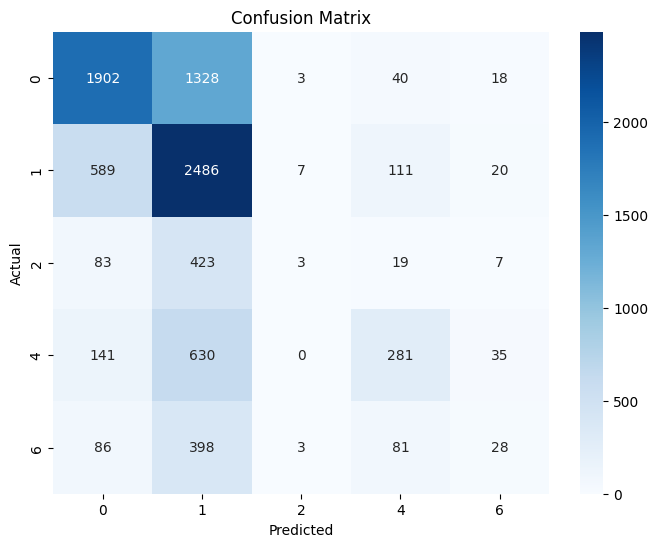

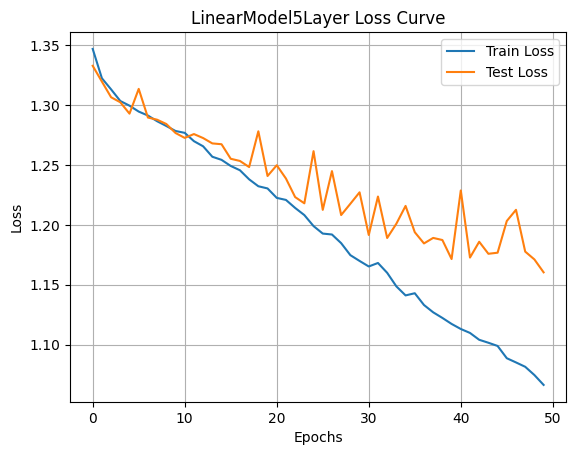

Time taken: 93.59 sec

Training CNN Model
Epoch 1, Train Loss: 1.3530, Test Loss: 1.3327
Epoch 5, Train Loss: 1.2726, Test Loss: 1.2647
Epoch 10, Train Loss: 1.1972, Test Loss: 1.1912
Epoch 15, Train Loss: 1.0855, Test Loss: 1.0948
Epoch 20, Train Loss: 1.0091, Test Loss: 1.0245
Epoch 25, Train Loss: 0.9653, Test Loss: 1.0005
Epoch 30, Train Loss: 0.9421, Test Loss: 1.0398
Epoch 35, Train Loss: 0.9173, Test Loss: 0.9945
Epoch 40, Train Loss: 0.8814, Test Loss: 0.9773
Epoch 45, Train Loss: 0.8387, Test Loss: 0.9813
Epoch 50, Train Loss: 0.8110, Test Loss: 0.9916

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      3291
           1       0.55      0.84      0.67      3213
           2       0.09      0.01      0.02       535
           4       0.52      0.34      0.41      1087
           6       0.28      0.12      0.17       596

    accuracy                           0.63      8722
   macro avg       0.46     

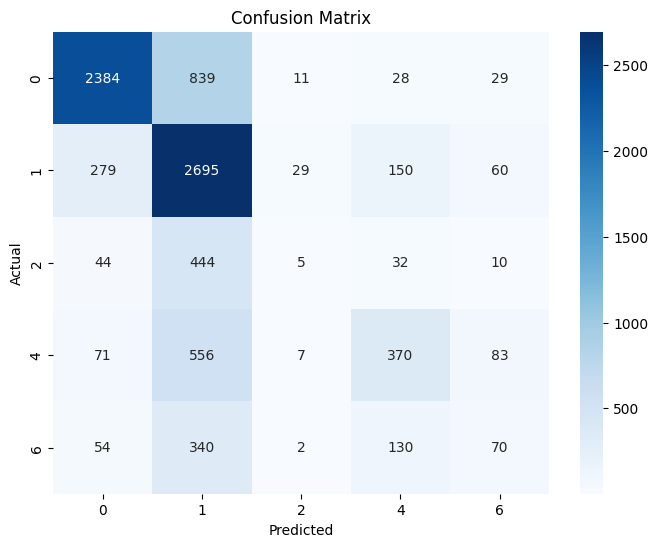

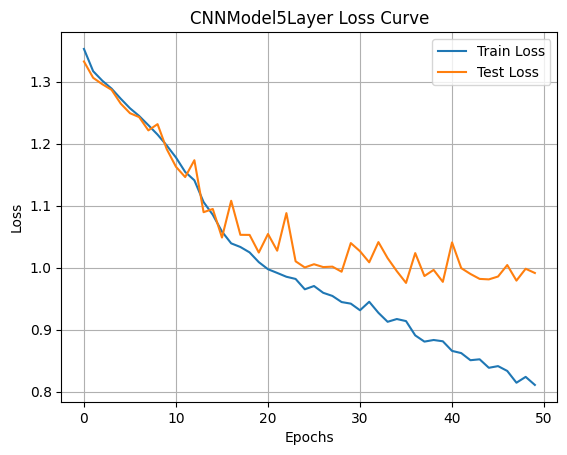

Time taken: 123.62 sec

Training RNN Model
Epoch 1, Train Loss: 1.3513, Test Loss: 1.3442
Epoch 5, Train Loss: 1.3191, Test Loss: 1.3192
Epoch 10, Train Loss: 1.3058, Test Loss: 1.3060
Epoch 15, Train Loss: 1.2947, Test Loss: 1.2919
Epoch 20, Train Loss: 1.2886, Test Loss: 1.2948
Epoch 25, Train Loss: 1.2814, Test Loss: 1.2942
Epoch 30, Train Loss: 1.2753, Test Loss: 1.2782
Epoch 35, Train Loss: 1.2707, Test Loss: 1.2808
Epoch 40, Train Loss: 1.2649, Test Loss: 1.2725
Epoch 45, Train Loss: 1.2592, Test Loss: 1.2587
Epoch 50, Train Loss: 1.2538, Test Loss: 1.2589

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.54      3291
           1       0.44      0.68      0.53      3213
           2       0.00      0.00      0.00       535
           4       0.36      0.25      0.29      1087
           6       0.00      0.00      0.00       596

    accuracy                           0.47      8722
   macro avg       0.27    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


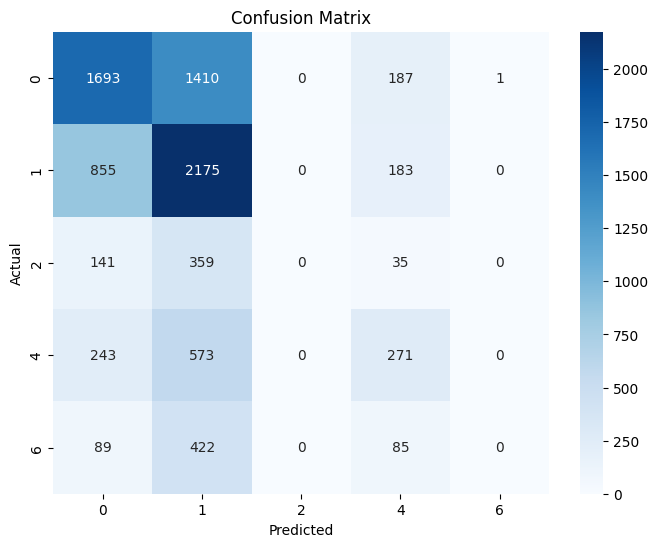

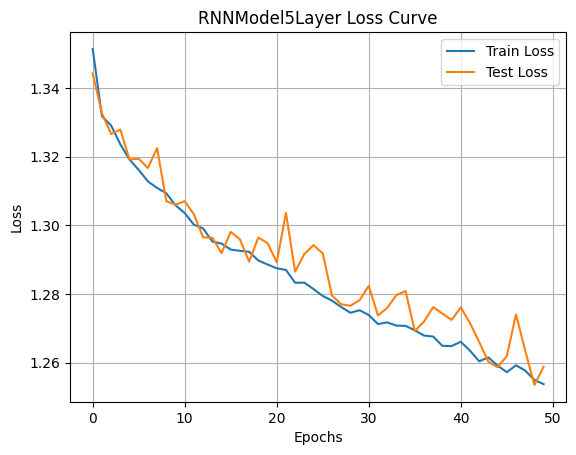

Time taken: 112.43 sec

Training LSTM Model
Epoch 1, Train Loss: 1.3797, Test Loss: 1.3478
Epoch 5, Train Loss: 1.3283, Test Loss: 1.3293
Epoch 10, Train Loss: 1.3060, Test Loss: 1.3061
Epoch 15, Train Loss: 1.2960, Test Loss: 1.2963
Epoch 20, Train Loss: 1.2921, Test Loss: 1.2976
Epoch 25, Train Loss: 1.2869, Test Loss: 1.2897
Epoch 30, Train Loss: 1.2817, Test Loss: 1.2876
Epoch 35, Train Loss: 1.2749, Test Loss: 1.2813
Epoch 40, Train Loss: 1.2647, Test Loss: 1.2661
Epoch 45, Train Loss: 1.2572, Test Loss: 1.2627
Epoch 50, Train Loss: 1.2418, Test Loss: 1.2516

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      3291
           1       0.45      0.56      0.50      3213
           2       0.00      0.00      0.00       535
           4       0.45      0.11      0.18      1087
           6       0.21      0.02      0.03       596

    accuracy                           0.47      8722
   macro avg       0.32   

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


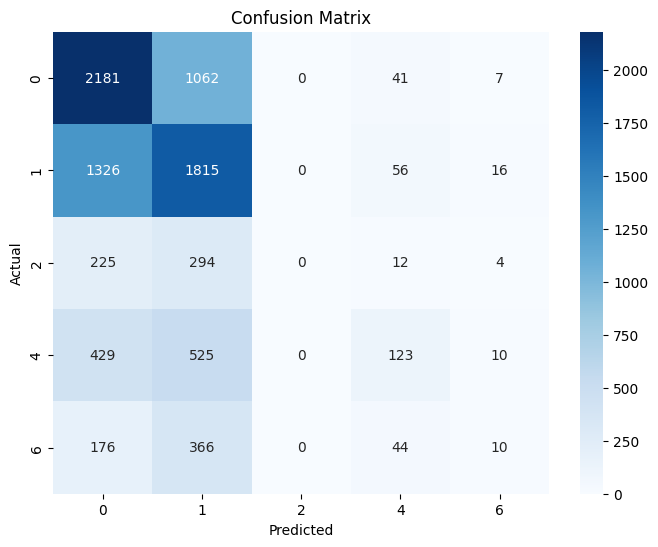

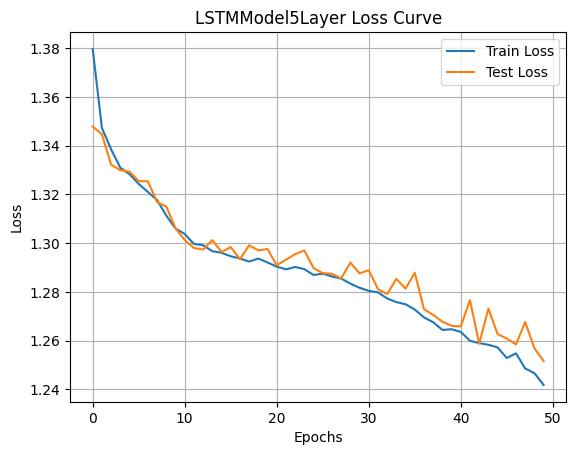

Time taken: 118.04 sec

Training GRU Model
Epoch 1, Train Loss: 1.3630, Test Loss: 1.3453
Epoch 5, Train Loss: 1.3137, Test Loss: 1.3126
Epoch 10, Train Loss: 1.2969, Test Loss: 1.3023
Epoch 15, Train Loss: 1.2868, Test Loss: 1.2911
Epoch 20, Train Loss: 1.2769, Test Loss: 1.2818
Epoch 25, Train Loss: 1.2717, Test Loss: 1.2752
Epoch 30, Train Loss: 1.2667, Test Loss: 1.2803
Epoch 35, Train Loss: 1.2594, Test Loss: 1.2610
Epoch 40, Train Loss: 1.2518, Test Loss: 1.2535
Epoch 45, Train Loss: 1.2446, Test Loss: 1.2611
Epoch 50, Train Loss: 1.2330, Test Loss: 1.2464

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.70      0.59      3291
           1       0.46      0.53      0.49      3213
           2       0.00      0.00      0.00       535
           4       0.40      0.16      0.23      1087
           6       0.17      0.01      0.02       596

    accuracy                           0.48      8722
   macro avg       0.31    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


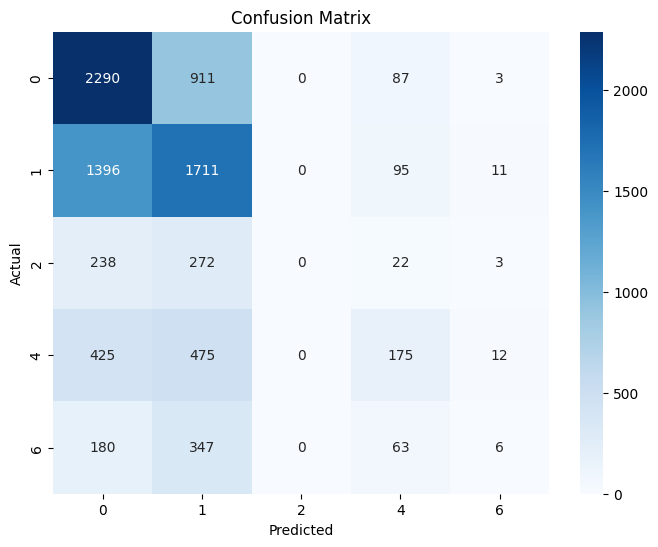

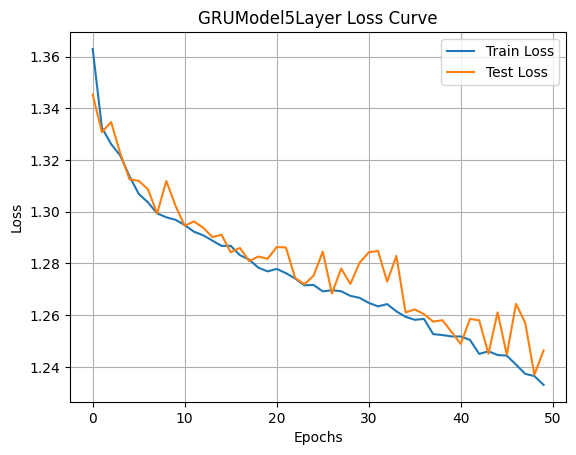

Time taken: 114.59 sec

Training BiLSTM Model
Epoch 1, Train Loss: 1.3698, Test Loss: 1.3482
Epoch 5, Train Loss: 1.3122, Test Loss: 1.3092
Epoch 10, Train Loss: 1.2930, Test Loss: 1.2955
Epoch 15, Train Loss: 1.2809, Test Loss: 1.2842
Epoch 20, Train Loss: 1.2628, Test Loss: 1.2638
Epoch 25, Train Loss: 1.2498, Test Loss: 1.2509
Epoch 30, Train Loss: 1.2341, Test Loss: 1.2537
Epoch 35, Train Loss: 1.2215, Test Loss: 1.2310
Epoch 40, Train Loss: 1.2131, Test Loss: 1.2482
Epoch 45, Train Loss: 1.2035, Test Loss: 1.2207
Epoch 50, Train Loss: 1.1932, Test Loss: 1.1976

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.72      0.62      3291
           1       0.48      0.59      0.53      3213
           2       0.17      0.00      0.00       535
           4       0.57      0.18      0.28      1087
           6       0.34      0.02      0.04       596

    accuracy                           0.51      8722
   macro avg       0.42 

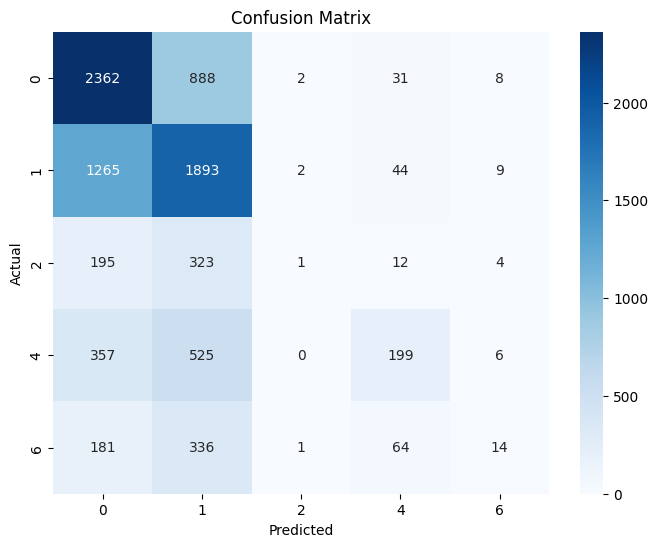

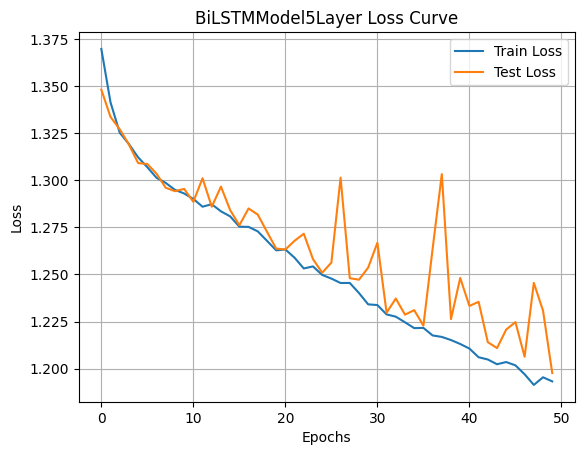

Time taken: 173.66 sec

Training Transformer Model


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Train Loss: 1.3557, Test Loss: 1.3535
Epoch 5, Train Loss: 1.3514, Test Loss: 1.3513
Epoch 10, Train Loss: 1.3508, Test Loss: 1.3505
Epoch 15, Train Loss: 1.3509, Test Loss: 1.3507
Epoch 20, Train Loss: 1.3326, Test Loss: 1.3363
Epoch 25, Train Loss: 1.3322, Test Loss: 1.3354
Epoch 30, Train Loss: 1.3301, Test Loss: 1.3332
Epoch 35, Train Loss: 1.3282, Test Loss: 1.3303
Epoch 40, Train Loss: 1.3249, Test Loss: 1.3272
Epoch 45, Train Loss: 1.3216, Test Loss: 1.3234
Epoch 50, Train Loss: 1.3181, Test Loss: 1.3201

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      3291
           1       0.42      0.74      0.54      3213
           2       0.00      0.00      0.00       535
           4       0.00      0.00      0.00      1087
           6       0.00      0.00      0.00       596

    accuracy                           0.44      8722
   macro avg       0.18      0.24      0.20      8722
weighted avg    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


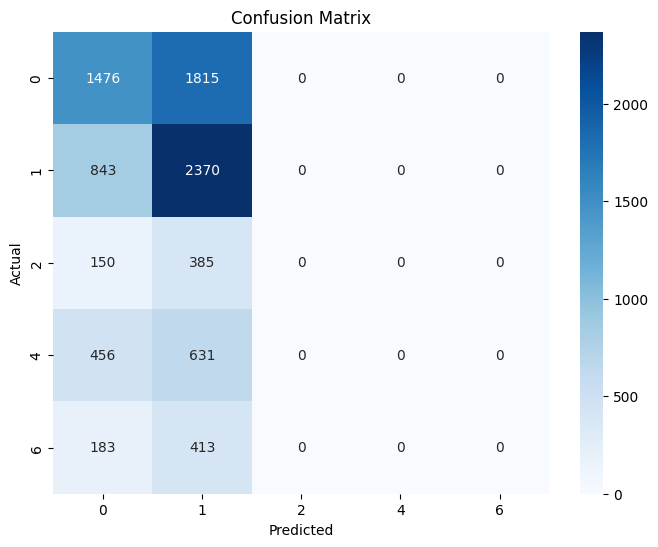

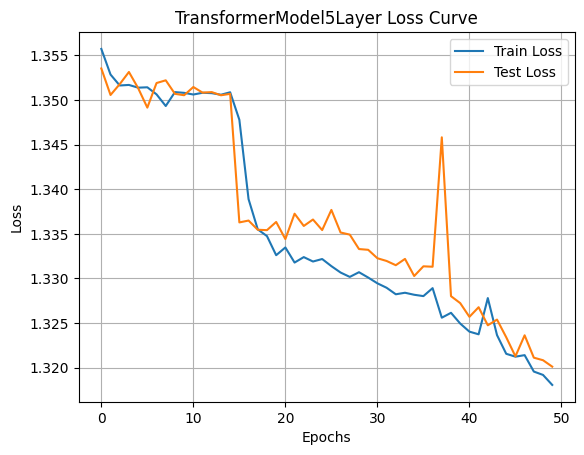

Time taken: 520.97 sec


In [39]:
for name, model_cls in model_dict1.items():
    print(f"\n{'='*30}\nTraining {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5).to(device)
    start_time = time.time()
    train_and_evaluate(model, train_loader, test_loader)
    print(f"Time taken: {time.time() - start_time:.2f} sec")


Training Linear Model
Epoch 1, Train Loss: 1.3446, Test Loss: 1.3268
Epoch 5, Train Loss: 1.2988, Test Loss: 1.3069
Epoch 10, Train Loss: 1.2782, Test Loss: 1.3003
Epoch 15, Train Loss: 1.2555, Test Loss: 1.2817
Epoch 20, Train Loss: 1.2335, Test Loss: 1.2465
Epoch 25, Train Loss: 1.2077, Test Loss: 1.2481
Epoch 30, Train Loss: 1.1782, Test Loss: 1.2335
Epoch 35, Train Loss: 1.1472, Test Loss: 1.2358
Epoch 40, Train Loss: 1.1266, Test Loss: 1.2189
Epoch 45, Train Loss: 1.0969, Test Loss: 1.2132
Epoch 50, Train Loss: 1.0754, Test Loss: 1.2075
Epoch 55, Train Loss: 1.0605, Test Loss: 1.2027
Epoch 60, Train Loss: 1.0341, Test Loss: 1.2311
Epoch 65, Train Loss: 1.0107, Test Loss: 1.2284
Epoch 70, Train Loss: 0.9884, Test Loss: 1.2704
Epoch 75, Train Loss: 0.9836, Test Loss: 1.2277
Epoch 80, Train Loss: 0.9440, Test Loss: 1.2410
Epoch 85, Train Loss: 0.9332, Test Loss: 1.2457
Epoch 90, Train Loss: 0.9228, Test Loss: 1.2475
Epoch 95, Train Loss: 0.8964, Test Loss: 1.2423
Epoch 100, Train Lo

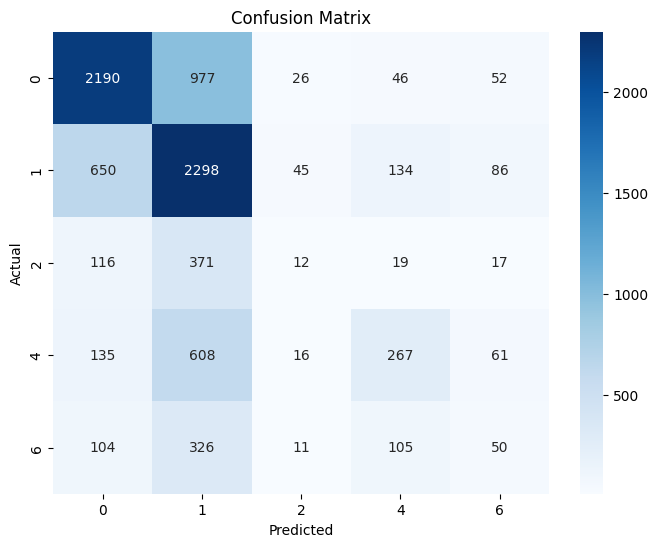

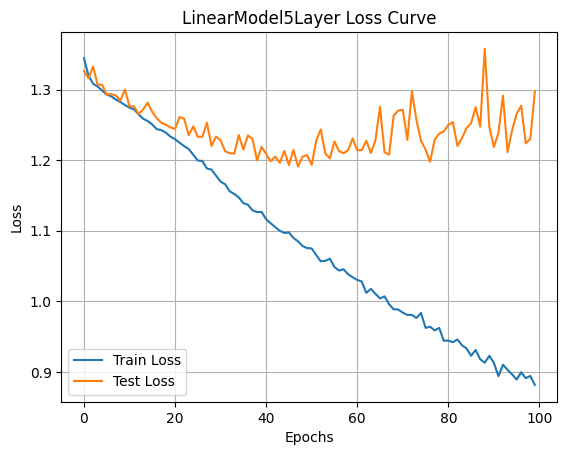

Time taken: 182.23 sec

Training CNN Model
Epoch 1, Train Loss: 1.3500, Test Loss: 1.3264
Epoch 5, Train Loss: 1.2669, Test Loss: 1.2526
Epoch 10, Train Loss: 1.1453, Test Loss: 1.1017
Epoch 15, Train Loss: 1.0239, Test Loss: 1.0739
Epoch 20, Train Loss: 0.9845, Test Loss: 1.0054
Epoch 25, Train Loss: 0.9446, Test Loss: 0.9828
Epoch 30, Train Loss: 0.9246, Test Loss: 0.9829
Epoch 35, Train Loss: 0.8973, Test Loss: 0.9563
Epoch 40, Train Loss: 0.8723, Test Loss: 0.9827
Epoch 45, Train Loss: 0.8558, Test Loss: 0.9726
Epoch 50, Train Loss: 0.8305, Test Loss: 1.0006
Epoch 55, Train Loss: 0.7834, Test Loss: 0.9774
Epoch 60, Train Loss: 0.7498, Test Loss: 1.0067
Epoch 65, Train Loss: 0.7195, Test Loss: 1.0878
Epoch 70, Train Loss: 0.6820, Test Loss: 1.0330
Epoch 75, Train Loss: 0.6615, Test Loss: 1.1379
Epoch 80, Train Loss: 0.6236, Test Loss: 1.0944
Epoch 85, Train Loss: 0.5791, Test Loss: 1.0991
Epoch 90, Train Loss: 0.5420, Test Loss: 1.2047
Epoch 95, Train Loss: 0.4991, Test Loss: 1.1766

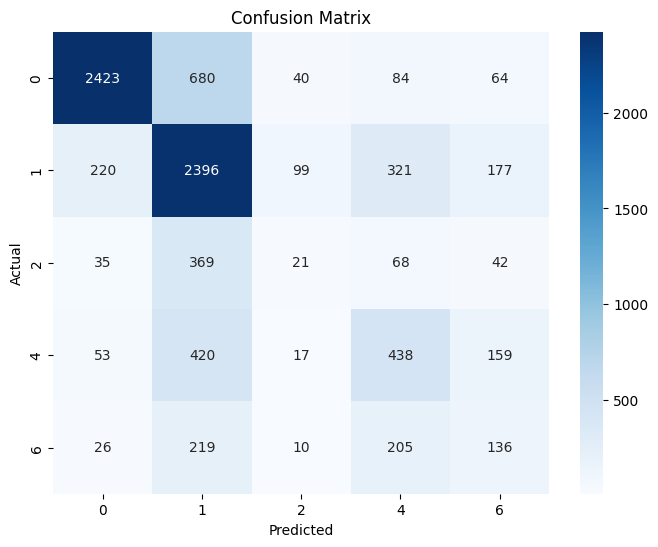

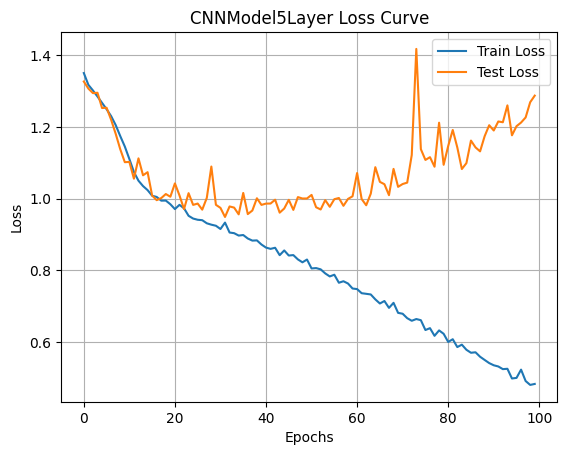

Time taken: 230.16 sec

Training RNN Model
Epoch 1, Train Loss: 1.3533, Test Loss: 1.3333
Epoch 5, Train Loss: 1.3241, Test Loss: 1.3243
Epoch 10, Train Loss: 1.3082, Test Loss: 1.3146
Epoch 15, Train Loss: 1.2997, Test Loss: 1.3061
Epoch 20, Train Loss: 1.2912, Test Loss: 1.2993
Epoch 25, Train Loss: 1.2849, Test Loss: 1.2878
Epoch 30, Train Loss: 1.2799, Test Loss: 1.3070
Epoch 35, Train Loss: 1.2800, Test Loss: 1.2949
Epoch 40, Train Loss: 1.2753, Test Loss: 1.2833
Epoch 45, Train Loss: 1.2736, Test Loss: 1.2823
Epoch 50, Train Loss: 1.2719, Test Loss: 1.2775
Epoch 55, Train Loss: 1.2655, Test Loss: 1.2821
Epoch 60, Train Loss: 1.2600, Test Loss: 1.2720
Epoch 65, Train Loss: 1.2476, Test Loss: 1.2578
Epoch 70, Train Loss: 1.2363, Test Loss: 1.2552
Epoch 75, Train Loss: 1.2294, Test Loss: 1.2403
Epoch 80, Train Loss: 1.2242, Test Loss: 1.2436
Epoch 85, Train Loss: 1.2125, Test Loss: 1.2089
Epoch 90, Train Loss: 1.1934, Test Loss: 1.1996
Epoch 95, Train Loss: 1.1765, Test Loss: 1.1773

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


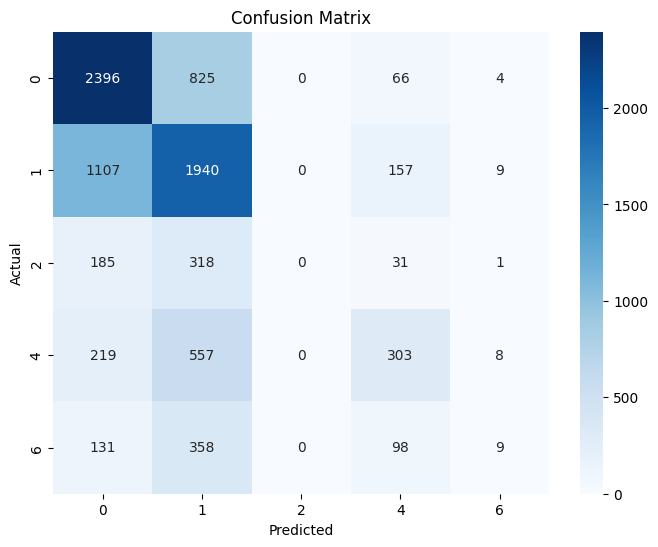

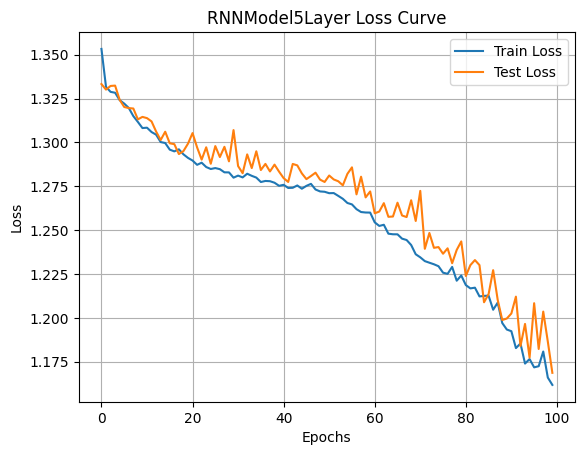

Time taken: 213.02 sec

Training LSTM Model
Epoch 1, Train Loss: 1.3838, Test Loss: 1.3478
Epoch 5, Train Loss: 1.3196, Test Loss: 1.3229
Epoch 10, Train Loss: 1.2988, Test Loss: 1.3038
Epoch 15, Train Loss: 1.2926, Test Loss: 1.2929
Epoch 20, Train Loss: 1.2864, Test Loss: 1.2826
Epoch 25, Train Loss: 1.2767, Test Loss: 1.2809
Epoch 30, Train Loss: 1.2689, Test Loss: 1.2729
Epoch 35, Train Loss: 1.2592, Test Loss: 1.2688
Epoch 40, Train Loss: 1.2535, Test Loss: 1.2577
Epoch 45, Train Loss: 1.2481, Test Loss: 1.2599
Epoch 50, Train Loss: 1.2396, Test Loss: 1.2614
Epoch 55, Train Loss: 1.2313, Test Loss: 1.2444
Epoch 60, Train Loss: 1.2193, Test Loss: 1.2294
Epoch 65, Train Loss: 1.2214, Test Loss: 1.2111
Epoch 70, Train Loss: 1.2111, Test Loss: 1.2219
Epoch 75, Train Loss: 1.2038, Test Loss: 1.2057
Epoch 80, Train Loss: 1.1935, Test Loss: 1.2063
Epoch 85, Train Loss: 1.1865, Test Loss: 1.1869
Epoch 90, Train Loss: 1.1788, Test Loss: 1.1950
Epoch 95, Train Loss: 1.1779, Test Loss: 1.214

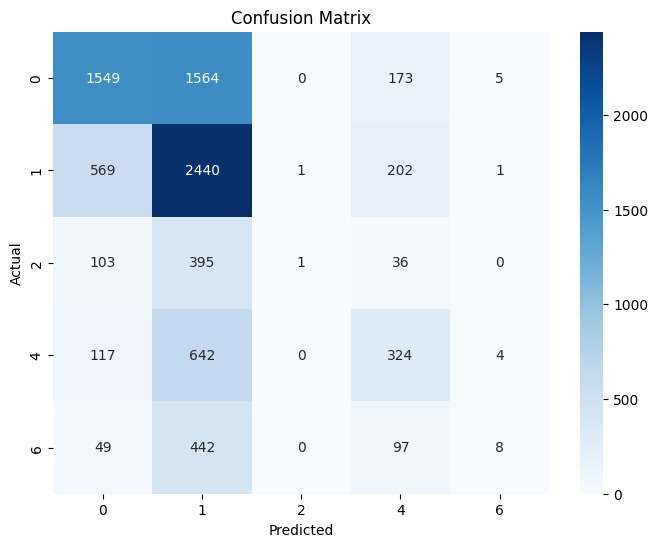

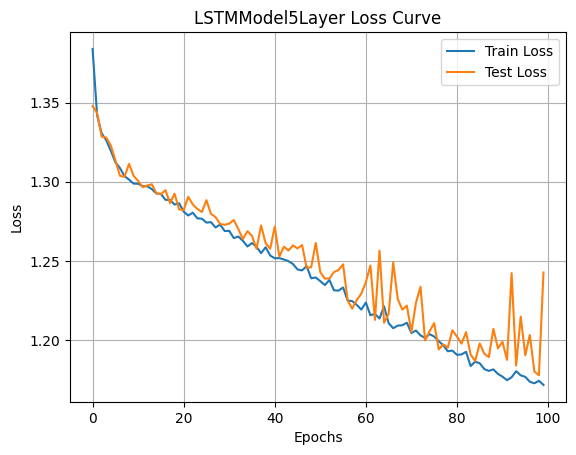

Time taken: 254.19 sec

Training GRU Model
Epoch 1, Train Loss: 1.3671, Test Loss: 1.3485
Epoch 5, Train Loss: 1.3116, Test Loss: 1.3057
Epoch 10, Train Loss: 1.2974, Test Loss: 1.3036
Epoch 15, Train Loss: 1.2917, Test Loss: 1.2908
Epoch 20, Train Loss: 1.2822, Test Loss: 1.2860
Epoch 25, Train Loss: 1.2671, Test Loss: 1.2752
Epoch 30, Train Loss: 1.2563, Test Loss: 1.2575
Epoch 35, Train Loss: 1.2431, Test Loss: 1.2580
Epoch 40, Train Loss: 1.2351, Test Loss: 1.2339
Epoch 45, Train Loss: 1.2220, Test Loss: 1.2221
Epoch 50, Train Loss: 1.2113, Test Loss: 1.2085
Epoch 55, Train Loss: 1.2083, Test Loss: 1.2269
Epoch 60, Train Loss: 1.1912, Test Loss: 1.1906
Epoch 65, Train Loss: 1.1805, Test Loss: 1.1709
Epoch 70, Train Loss: 1.1742, Test Loss: 1.1944
Epoch 75, Train Loss: 1.1656, Test Loss: 1.1587
Epoch 80, Train Loss: 1.1597, Test Loss: 1.1651
Epoch 85, Train Loss: 1.1524, Test Loss: 1.1668
Epoch 90, Train Loss: 1.1377, Test Loss: 1.1549
Epoch 95, Train Loss: 1.1073, Test Loss: 1.1224

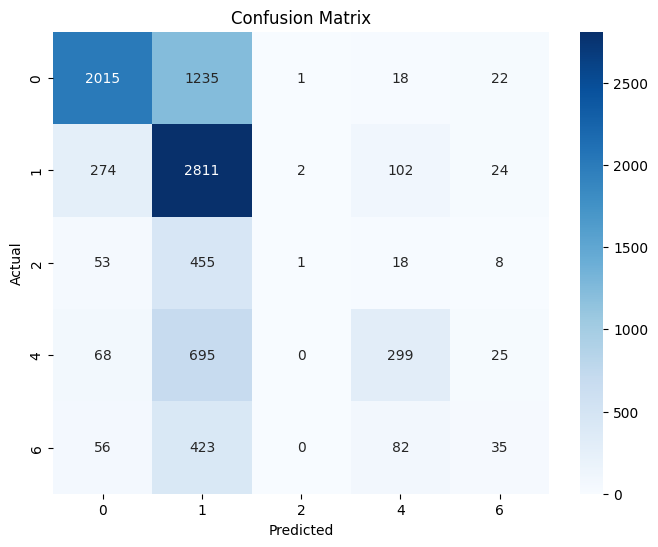

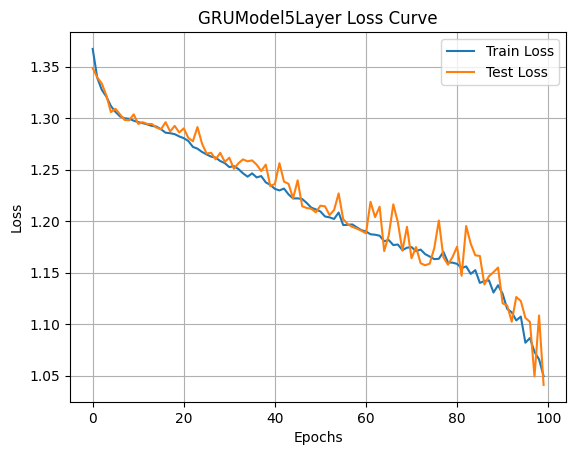

Time taken: 280.22 sec

Training BiLSTM Model
Epoch 1, Train Loss: 1.3643, Test Loss: 1.3466
Epoch 5, Train Loss: 1.3106, Test Loss: 1.3081
Epoch 10, Train Loss: 1.2963, Test Loss: 1.2987
Epoch 15, Train Loss: 1.2878, Test Loss: 1.3137
Epoch 20, Train Loss: 1.2763, Test Loss: 1.2828
Epoch 25, Train Loss: 1.2698, Test Loss: 1.2764
Epoch 30, Train Loss: 1.2606, Test Loss: 1.2730
Epoch 35, Train Loss: 1.2509, Test Loss: 1.2511
Epoch 40, Train Loss: 1.2382, Test Loss: 1.2483
Epoch 45, Train Loss: 1.2252, Test Loss: 1.2387
Epoch 50, Train Loss: 1.2189, Test Loss: 1.2374
Epoch 55, Train Loss: 1.2100, Test Loss: 1.2340
Epoch 60, Train Loss: 1.2056, Test Loss: 1.2423
Epoch 65, Train Loss: 1.1986, Test Loss: 1.2343
Epoch 70, Train Loss: 1.1862, Test Loss: 1.2449
Epoch 75, Train Loss: 1.1746, Test Loss: 1.2240
Epoch 80, Train Loss: 1.1713, Test Loss: 1.2122
Epoch 85, Train Loss: 1.1664, Test Loss: 1.2154
Epoch 90, Train Loss: 1.1550, Test Loss: 1.2198
Epoch 95, Train Loss: 1.1465, Test Loss: 1.2

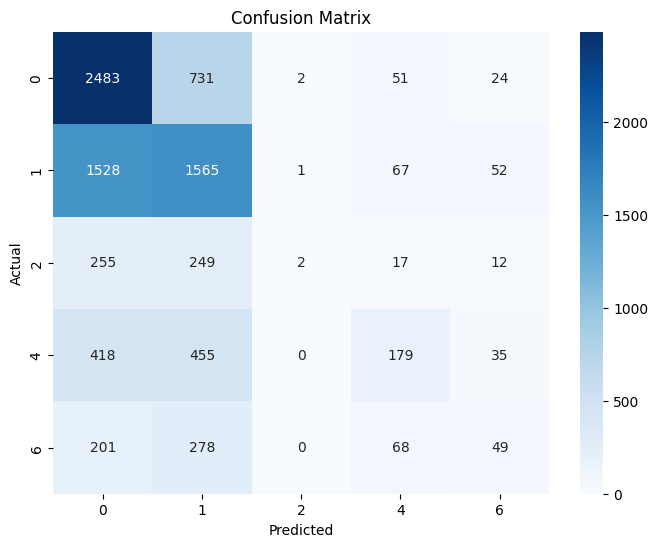

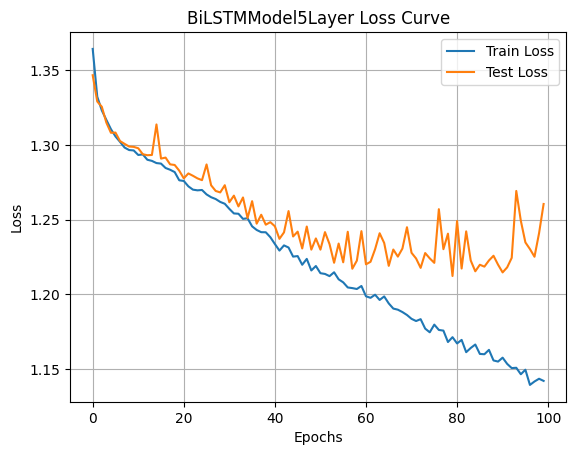

Time taken: 406.67 sec

Training Transformer Model


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Train Loss: 1.3701, Test Loss: 1.3516
Epoch 5, Train Loss: 1.3462, Test Loss: 1.3508
Epoch 10, Train Loss: 1.3346, Test Loss: 1.3343
Epoch 15, Train Loss: 1.3335, Test Loss: 1.3339
Epoch 20, Train Loss: 1.3314, Test Loss: 1.3314
Epoch 25, Train Loss: 1.3278, Test Loss: 1.3300
Epoch 30, Train Loss: 1.3252, Test Loss: 1.3275
Epoch 35, Train Loss: 1.3234, Test Loss: 1.3268
Epoch 40, Train Loss: 1.3215, Test Loss: 1.3216
Epoch 45, Train Loss: 1.3158, Test Loss: 1.3034
Epoch 50, Train Loss: 1.3033, Test Loss: 1.3004
Epoch 55, Train Loss: 1.2964, Test Loss: 1.2892
Epoch 60, Train Loss: 1.2956, Test Loss: 1.2909
Epoch 65, Train Loss: 1.2927, Test Loss: 1.2874
Epoch 70, Train Loss: 1.2896, Test Loss: 1.2781
Epoch 75, Train Loss: 1.2923, Test Loss: 1.2957
Epoch 80, Train Loss: 1.2987, Test Loss: 1.2900
Epoch 85, Train Loss: 1.2793, Test Loss: 1.2755
Epoch 90, Train Loss: 1.2806, Test Loss: 1.2845
Epoch 95, Train Loss: 1.2811, Test Loss: 1.2708
Epoch 100, Train Loss: 1.2794, Test Loss: 

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


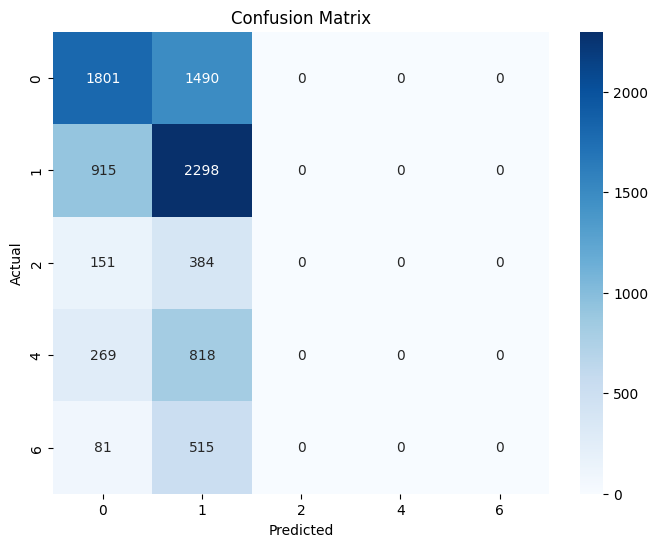

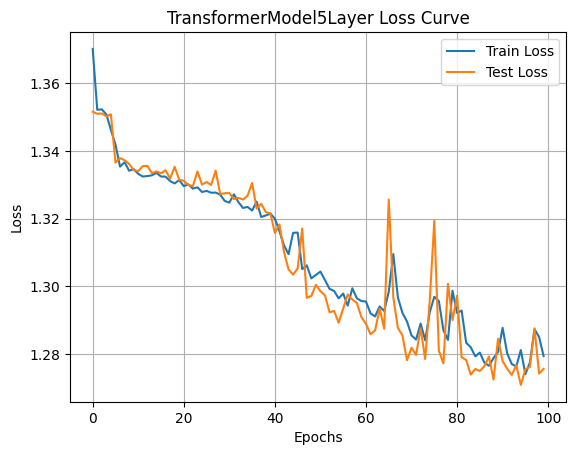

Time taken: 1134.76 sec


In [40]:
for name, model_cls in model_dict1.items():
    print(f"\n{'='*30}\nTraining {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5).to(device)
    start_time = time.time()
    train_and_evaluate1(model, train_loader, test_loader)
    print(f"Time taken: {time.time() - start_time:.2f} sec")